# KNN Model

0.24.1


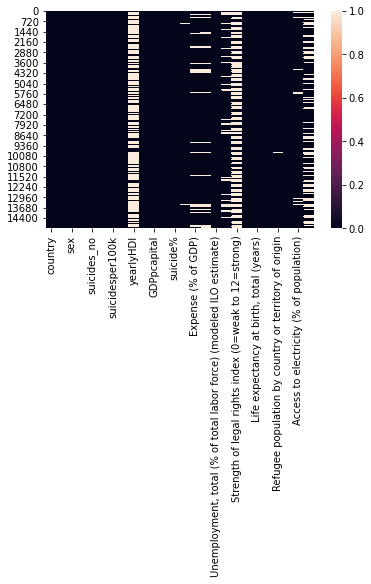

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 26 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   country                                                                            15110 non-null  object 
 1   year                                                                               15110 non-null  int64  
 2   sex                                                                                15110 non-null  object 
 3   age                                                                                15110 non-null  object 
 4   suicides_no                                                                        15110 non-null  int64  
 5   population                                                                         15110 non-null  int

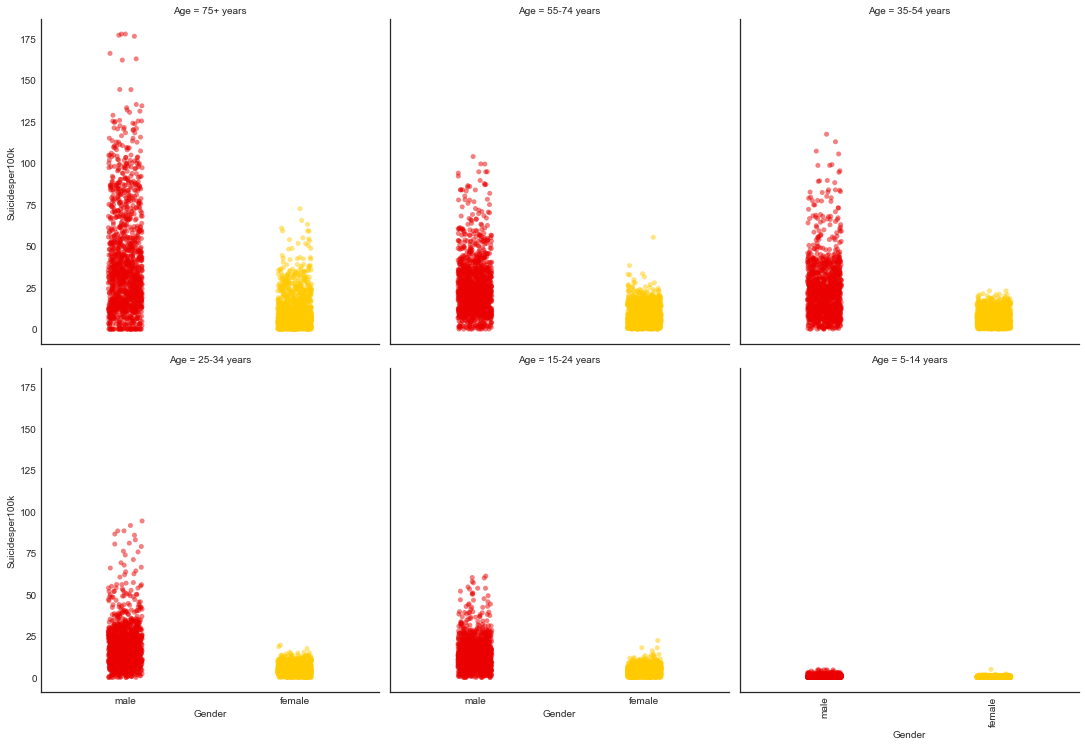

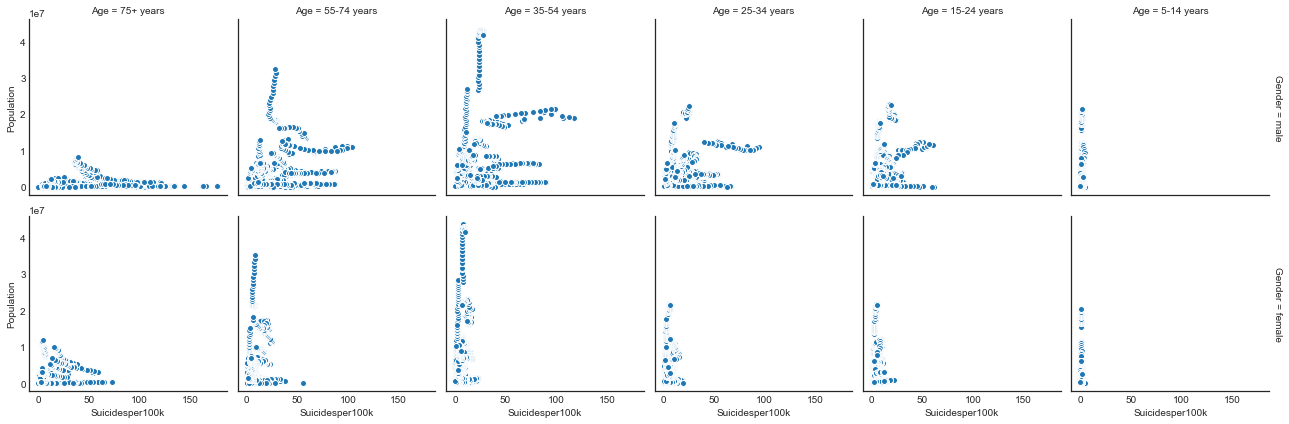

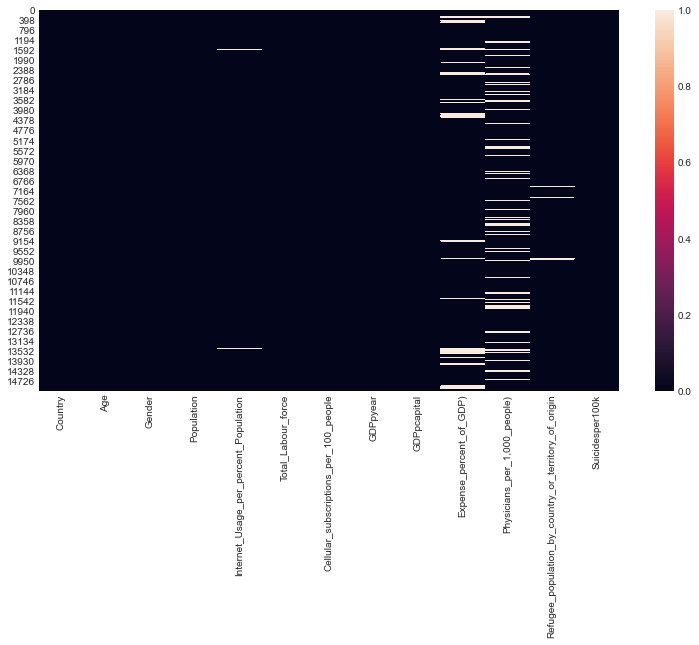

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Country                                               15110 non-null  object 
 1   Age                                                   15110 non-null  object 
 2   Gender                                                15110 non-null  object 
 3   Population                                            15110 non-null  int64  
 4   Internet_Usage_per_percent_Population                 15002 non-null  float64
 5   Total_Labour_force                                    15110 non-null  int64  
 6   Cellular_subscriptions_per_100_people                 15110 non-null  float64
 7   GDPpyear                                              15110 non-null  float64
 8   GDPpcapital                                           15

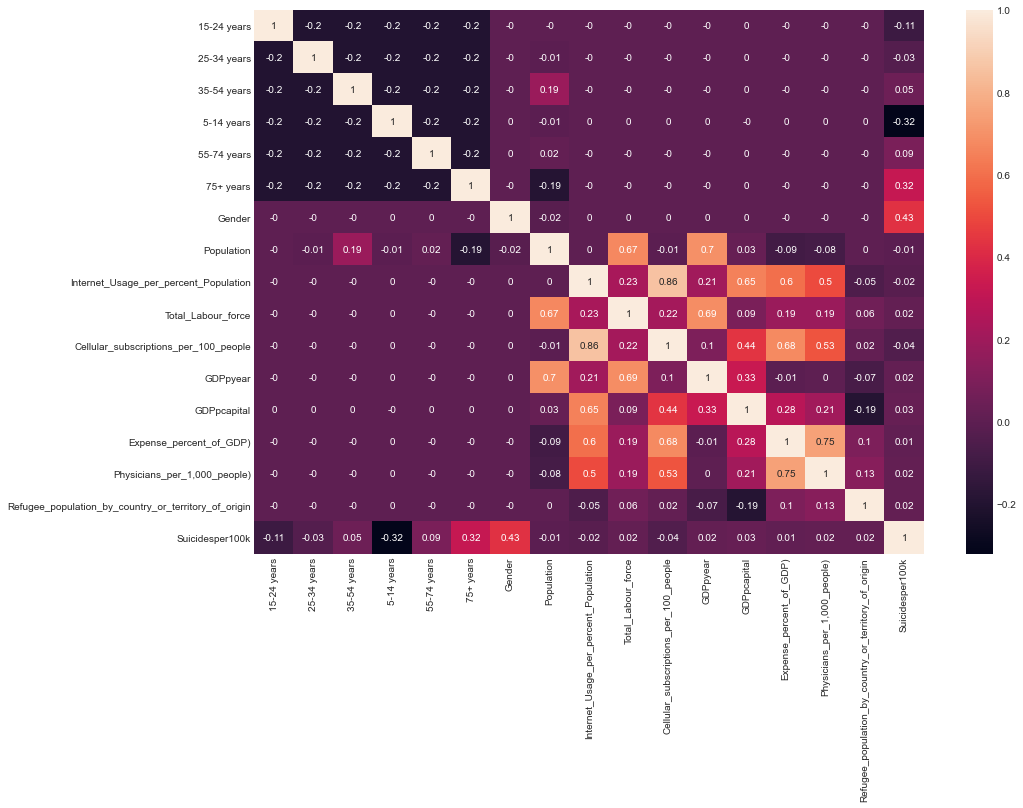

   Argentina  Armenia  Australia  Austria  Azerbaijan  Belgium  Brazil  \
0          1        0          0        0           0        0       0   
1          1        0          0        0           0        0       0   
2          1        0          0        0           0        0       0   
3          1        0          0        0           0        0       0   
4          1        0          0        0           0        0       0   

   Bulgaria  Canada  Chile  ...  Sweden  Switzerland  Thailand  Turkey  \
0         0       0      0  ...       0            0         0       0   
1         0       0      0  ...       0            0         0       0   
2         0       0      0  ...       0            0         0       0   
3         0       0      0  ...       0            0         0       0   
4         0       0      0  ...       0            0         0       0   

   Turkmenistan  Ukraine  United Arab Emirates  United Kingdom  United States  \
0             0        0     

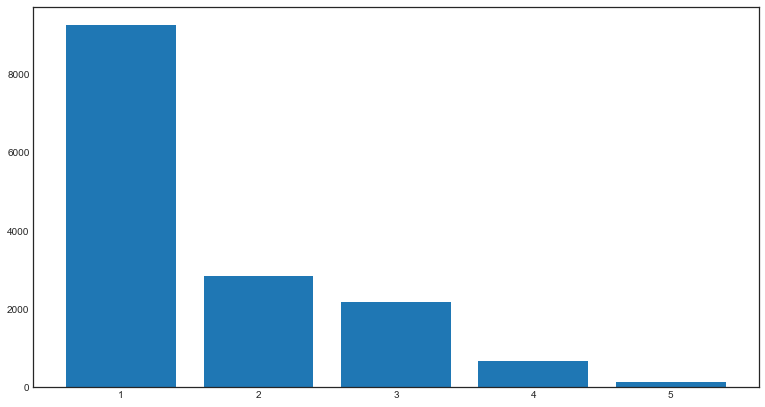

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                                                15

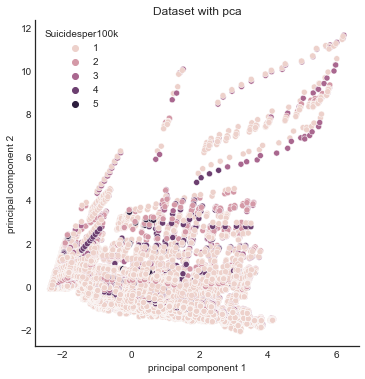

       principal component 1  principal component 2  principal component 3  \
0                  -2.266491               0.015867              -0.510953   
1                  -2.245241               0.187276              -0.394339   
2                  -2.229859               0.325128              -0.284176   
3                  -2.263777               0.181092              -0.228213   
4                  -2.265216               0.172865              -0.229795   
...                      ...                    ...                    ...   
15105              -2.255998               0.328735              -0.171963   
15106              -2.323453              -0.056966              -0.246123   
15107              -2.273698               0.227526              -0.191423   
15108              -2.276390               0.212138              -0.194381   
15109              -2.300975               0.071564              -0.221410   

       Suicidesper100k  
0                    3  
1            

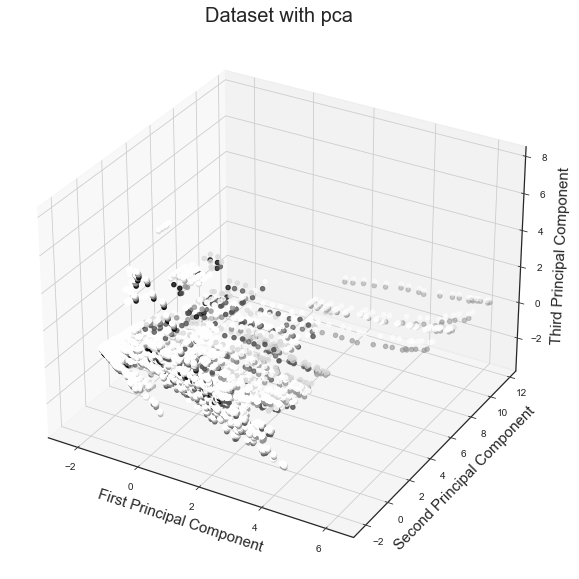

Number of Components  4
       principal component 1  principal component 2  principal component 3  \
0                  -2.266491               0.015867              -0.510953   
1                  -2.245241               0.187276              -0.394339   
2                  -2.229859               0.325128              -0.284176   
3                  -2.263777               0.181092              -0.228213   
4                  -2.265216               0.172865              -0.229795   
...                      ...                    ...                    ...   
15105              -2.255998               0.328735              -0.171963   
15106              -2.323453              -0.056966              -0.246123   
15107              -2.273698               0.227526              -0.191423   
15108              -2.276390               0.212138              -0.194381   
15109              -2.300975               0.071564              -0.221410   

       principal component 4  Suicidesp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                                                15

In [1]:
%run X_and_y_selection.ipynb  #  importing a .ipynb file

## k-fold cross-validation Graph

In [2]:
def subplot(list_for_plot, ave_scores, hyper_pram_to_use_name):
    
    print("Average " + hyper_pram_to_use_name + " scores", ave_scores)  # printing the average score of the model
    
    plt.figure()
    plt.title("Best " + hyper_pram_to_use_name + " Selection",fontsize=18)  # Displays plot title
    plt.plot(list_for_plot, ave_scores)  # Displays description of the plots x and y labels.
    plt.xlabel(hyper_pram_to_use_name +" values")  # Displays the x axis for the plot
    plt.ylabel("Average CV model accuracy")  # Displays the y axis for the plot
    plt.legend([hyper_pram_to_use_name], loc="lower right")  # adds a legend to the plot.
    plt.grid()  # adds a gird to the plot
    

In [3]:
def K_NN_plot_Values(X,y):  # Values required for plotting
    ave_scores = []  # Creating a empty list
    k_list = k_list = list(range(1,50))  # Setting the values for the K_list  variable.
    for single_val in k_list:  # looping through each value in the k_list variable
        model = KNeighborsClassifier(n_neighbors = single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.

    
    subplot(k_list, ave_scores, "n_neighbors") # using the function to plot x and y values.
    

    
    ave_scores = []  # Creating a empty list
    weight_list = ["uniform", "distance"]  # weights list uniform and distance
    for single_val in weight_list:  # looping through each value in the k_list variable
        model = KNeighborsClassifier(weights = single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.

    
    subplot(weight_list, ave_scores, "weights") # using the function to plot x and y values 
    
    
    
    
    ave_scores = []  # Creating a empty list
    metric_list =  ['minkowski','euclidean','manhattan']  # a list of KNN metrics 
    for single_val in metric_list:  # looping through each value in the k_list variable
        model = KNeighborsClassifier(metric = single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.

    
    subplot(metric_list, ave_scores, "metric") # using the function to plot x and y values 

## k-fold cross-validation

In [74]:
def crossvalscore(model, X, y, cv_val):  # function to perform cross validation with model X, y and cv_val as parameters
    score = cross_val_score(estimator = model, X = X, y = y, cv = cv_val)   # performs different tests to get best accurecy.
    print("Accuracy: {:.2f} %".format(score.mean()*100))  # accuracy printed.
    print("Standard Deviation: {:.2f} %".format(score.std()*100))  # standard deveation printed (std -avarage or std+ avarage )
    return ("Accuracy: {:.2f} %".format(score.mean()*100))  # Accuracy is returned.

# X and y un_edited

## Plotting the KNN's with a average Cross-val score

Average n_neighbors scores [0.307, 0.442, 0.44, 0.465, 0.471, 0.498, 0.505, 0.524, 0.54, 0.556, 0.557, 0.56, 0.558, 0.562, 0.566, 0.568, 0.566, 0.569, 0.573, 0.574, 0.577, 0.579, 0.582, 0.583, 0.584, 0.584, 0.585, 0.586, 0.587, 0.587, 0.588, 0.589, 0.588, 0.589, 0.59, 0.59, 0.591, 0.592, 0.591, 0.591, 0.592, 0.592, 0.592, 0.592, 0.592, 0.592, 0.592, 0.592, 0.592]
Average weights scores [0.471, 0.4]
Average metric scores [0.471, 0.471, 0.469]


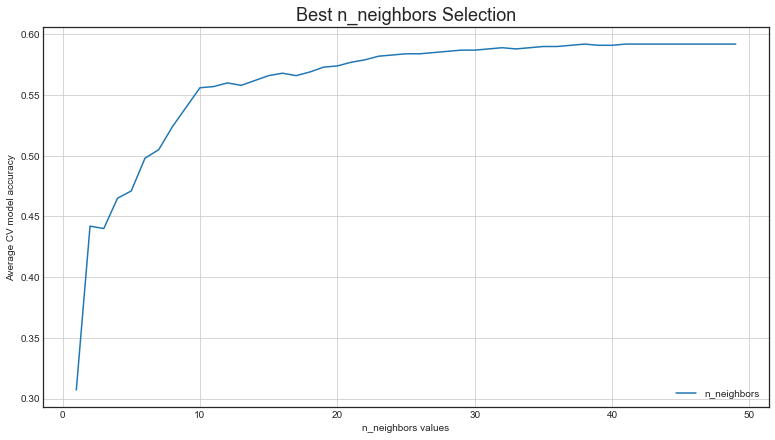

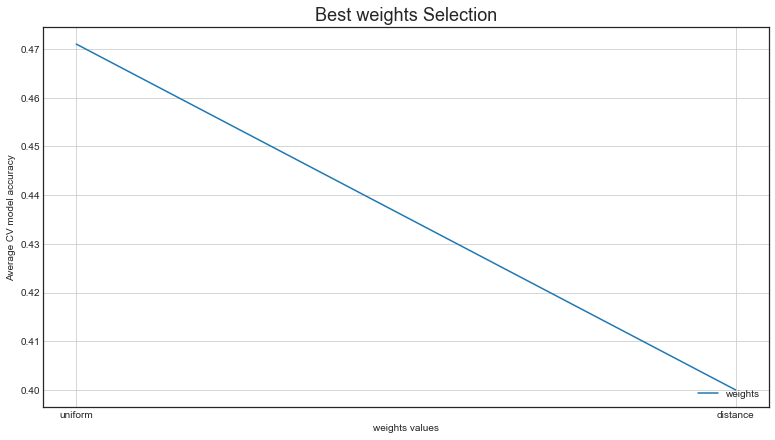

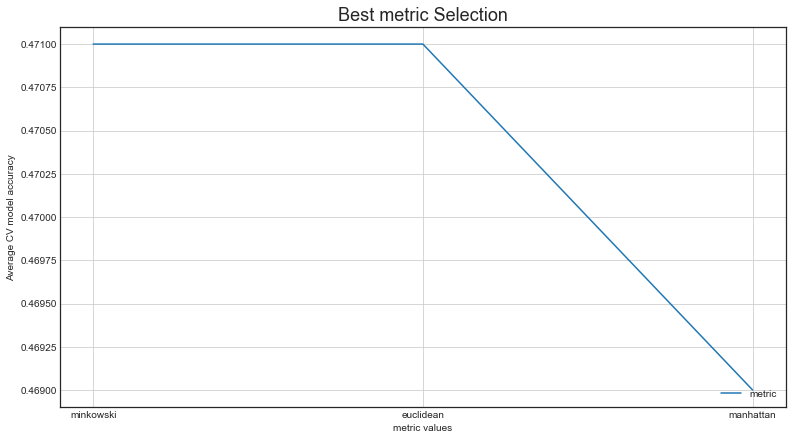

In [4]:
K_NN_plot_Values(X,y)  # PLots KNN Cross Val score

In [79]:
crossvalscore(KNeighborsClassifier(weights = 'uniform', n_neighbors = 30,), X, y, 10)  # Performs cross validation.

Accuracy: 57.99 %
Standard Deviation: 3.29 %


'Accuracy: 57.99 %'

# Over Sampled X and y values

## Plotting the KNN's with a average Cross-val score

Average n_neighbors scores [0.8, 0.753, 0.753, 0.709, 0.704, 0.669, 0.664, 0.639, 0.636, 0.622, 0.623, 0.611, 0.611, 0.603, 0.603, 0.598, 0.596, 0.595, 0.592, 0.587, 0.584, 0.582, 0.578, 0.572, 0.569, 0.564, 0.559, 0.555, 0.553, 0.547, 0.545, 0.541, 0.537, 0.534, 0.53, 0.527, 0.525, 0.523, 0.522, 0.519, 0.516, 0.514, 0.512, 0.51, 0.507, 0.505, 0.502, 0.501, 0.498]
Average weights scores [0.704, 0.799]
Average metric scores [0.704, 0.704, 0.704]


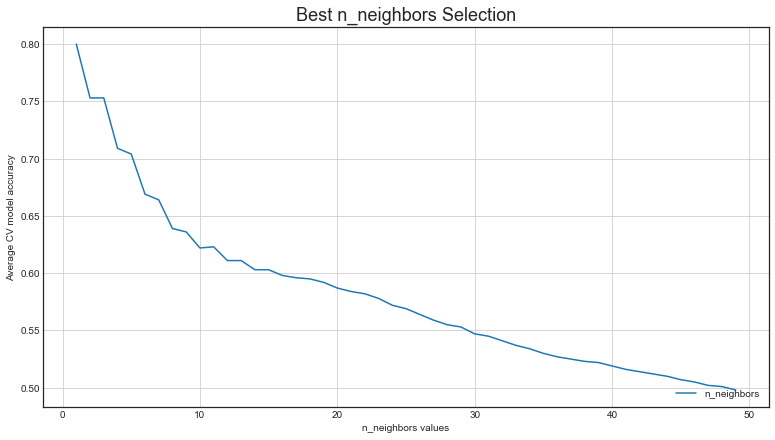

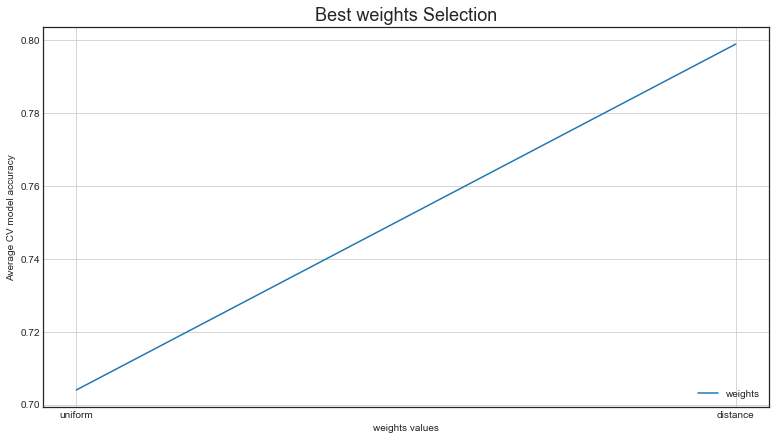

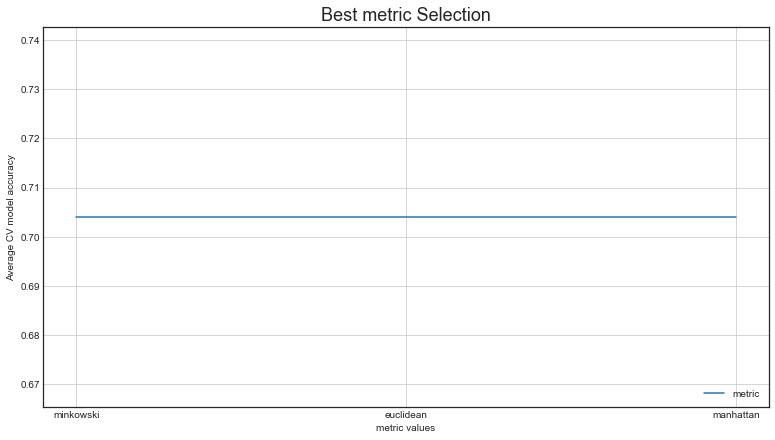

In [5]:
K_NN_plot_Values(X_over,y_over)  # PLots KNN Cross Val score

In [86]:
crossvalscore(KNeighborsClassifier(weights = 'distance', n_neighbors = 1), X_over, y_over, 10)  # Performs cross validation.

Accuracy: 80.28 %
Standard Deviation: 2.05 %


'Accuracy: 80.28 %'

#  X and y obtained by using Corelation matrix

## Plotting the KNN's with a average Cross-val score

Average n_neighbors scores [0.556, 0.573, 0.553, 0.556, 0.549, 0.574, 0.577, 0.575, 0.568, 0.583, 0.574, 0.551, 0.583, 0.584, 0.583, 0.586, 0.588, 0.578, 0.587, 0.582, 0.577, 0.578, 0.576, 0.564, 0.571, 0.572, 0.571, 0.571, 0.574, 0.579, 0.574, 0.578, 0.58, 0.58, 0.582, 0.579, 0.58, 0.58, 0.579, 0.58, 0.58, 0.581, 0.581, 0.585, 0.585, 0.585, 0.584, 0.585, 0.579]
Average weights scores [0.549, 0.549]
Average metric scores [0.549, 0.549, 0.549]


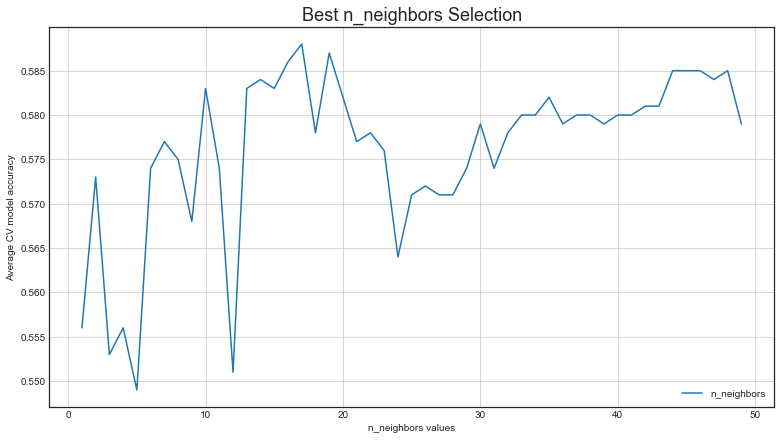

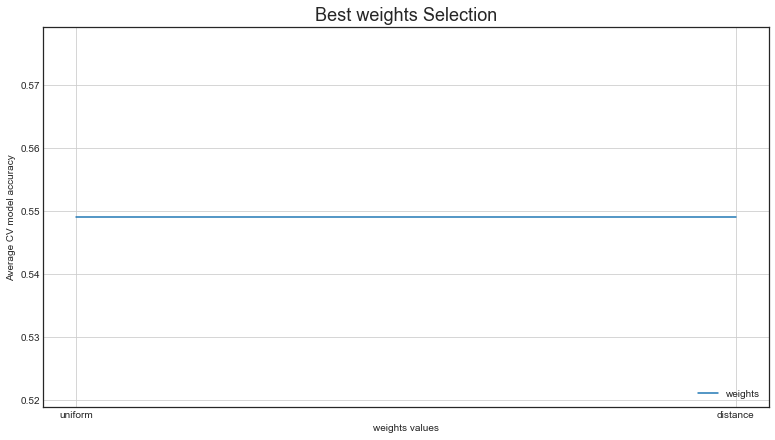

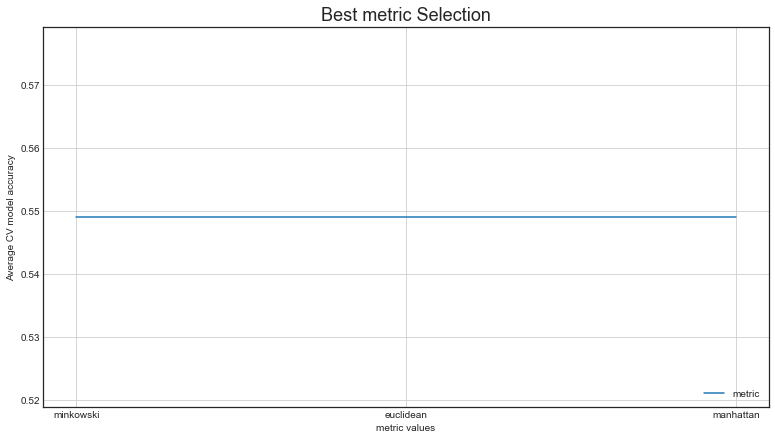

In [6]:
K_NN_plot_Values(X2,y)  # PLots KNN Cross Val score

In [81]:
crossvalscore(KNeighborsClassifier(weights = 'uniform', n_neighbors = 17,), X, y, 10)  # Performs cross validation.

Accuracy: 54.54 %
Standard Deviation: 3.32 %


'Accuracy: 54.54 %'

# Random Search plot

In [7]:
def Random_search_plot(sorted_list1, sorted_list2, sorted_uniform, sorted_distance, single_val):
    plt.figure(dpi=100, figsize=(14, 7))  # setting the plot size
    plt.title("Random Search Hyper parameter Comparison with " + single_val + " metric",\
              fontsize=25, color="blue")  # setting the plot title.
    plt.plot(sorted_list1,sorted_uniform , "--",marker = "o", label="weights uniform", color="red")  # setting the 
                                                                                                     # uniform variables 
                                                                # values to the plot on the y axis and K_list  on the x axis.
    plt.plot(sorted_list2,sorted_distance , ":",marker = "*", label="weights distant", color="blue")  # setting the distant 
                                                            # variables values to the plot on the y axis and K_list  
                                                           # on the x axis.
    plt.xlabel("Number of nearest neighbours", fontsize=20)  # Setting the x label.
    plt.ylabel("Avarage CV Score", fontsize=20)  # setting the y label.
    plt.legend(loc='upper left')   # setting the legend.
    plt.grid()  # setting a grid

# sub function to preform Random Search

In [8]:
def rand_search_fun(typeofmodelandprams, dict_prams,crossval, X, y):  # Function takes in the model type, 
                                                            # number of crossvalidation sand X and y values as hyperparameters.

    model = typeofmodelandprams  # creating an instance of the object.
    parameters = [dict_prams]  # hyper parameters for the random search 
    rand_search = RandomizedSearchCV(
                           model,
        #estimator = model,  # model
                           #param_distributions = parameters,  # hyper paramaters 
                           parameters,
                           scoring = 'accuracy',  # score measurement
                           cv = crossval, # number of cross validations 
                           n_jobs = -1, # selecting all possible paramaters to go through to get the best model possible 
                           return_train_score=False, # train score is false as it can be computationaly 
                                                  # expensive. without storing the traning score the grd search is fater
                           n_iter=10,  # setting the number of iterations
                           random_state=5)  
    rand_search.fit(X, y)  # applying the search on our model.
    #print(pd.DataFrame(rand_search.cv_results_)[["mean_test_score","params"]])
    print(pd.DataFrame(rand_search.cv_results_)) # to print the whole result

    best_accuracy = rand_search.best_score_  # the best accuracy 
    best_parameters = rand_search.best_params_  # the best paramaters that gave the best accurecy
    print("Best Accuracy: {:.2f} %".format(best_accuracy*100))  # printing best accuracy
    print("Best Parameters:", best_parameters)  # printing the best parameters
    
    print(parameters)  # prininting the parameters 


    return rand_search  # return random search value.
    



# Performs full Random Search on KNN Model

In [9]:
def KNN_full_rand_search(X, y):  # performs randomized search

    # Random search 

    metric_list =  ['minkowski','euclidean','manhattan']
    k_list = list(range(1,31))  # list from 1 - 30 (will be used as KNN's)
    for single_val in metric_list:
        weight_list = ["uniform"]  # weights list uniform and distance
        para_rand = dict(n_neighbors=k_list,weights=weight_list, metric=[single_val])  # adding the above lists in a dictinorr.
        rand_search = rand_search_fun(KNeighborsClassifier(), para_rand, 5, X, y)  # Using the grid search gunction with
                                                                                                       # arguments given 

        uniform = []  # creating a empty list
        k_list1 = []  # creating a empty list
        for i in range(len(rand_search.cv_results_["mean_test_score"])):  # looping through the times the length of 
                                                                          # the mean_test_score

                uniform.append(rand_search.cv_results_["mean_test_score"][i])  # appending the uniform values ot the 
                                                                               # uniform variable.
                k_list1.append(rand_search.cv_results_["param_n_neighbors"][i])  # appedning the KNN's to the K_list1.

        sorted_uniform = []  # creating a empty list
        sorted_list1 = k_list1.copy()  # creating a copy of the K_list1 variables values.
        sorted_list1.sort()   # sorting the KNNs
        for i in range(len(sorted_list1)):  # Looping through the lenght of the sorted_list1 variable.
            for j in range(len(k_list1)):  # Looping through the lenght of the K_list1 variable.
                if sorted_list1[i] == k_list1[j]:  # checking that if the values of sorted_list1[i] is equal to k_list1[j]
                    sorted_uniform.append(uniform[j])  # appeding the unifrom[j] values to the sorted_uniform list.

        weight_list = ["distance"]  # weights list distance
        para_rand = dict(n_neighbors=k_list,weights=weight_list,metric=[single_val])  # adding the above lists in a dictinory.
        
        print("\nunsorted kNN ",k_list1) # checking out put of  the given variables values 
        print("sorted KNN ", sorted_list1)  # checking out put of  the given variables values 
        print("unsorted Uniform ", uniform)  # checking out put of  the given variables values 
        print("sorted uniform ", sorted_uniform, "\n")  # checking out put of  the given variables values  



        rand_search = rand_search_fun(KNeighborsClassifier(), para_rand, 5, X, y)  # Using the grid search gunction with 
                                                                                  # arguments given 

        distance = []  # creating a empty list
        k_list2 = []  # creating a empty list
        for i in range(len(rand_search.cv_results_["mean_test_score"])):  # looping through the times the length of 
                                                                          # the mean_test_score
                distance.append(rand_search.cv_results_["mean_test_score"][i])  # appending the distance values ot the 
                                                                               # distance variable.
                k_list2.append(rand_search.cv_results_["param_n_neighbors"][i])  # appedning the KNN's to the K_list2.

        sorted_distance = []  # creating a empty list
        sorted_list2 = k_list2.copy()   # creating a copy of the K_list2 variables values.
        sorted_list2.sort()  # sorting the KNNs
        for i in range(len(sorted_list2)):  # Looping through the lenght of the sorted_list2 variable.
            for j in range(len(k_list2)):  # Looping through the lenght of the K_list2 variable.
                if sorted_list2[i] == k_list2[j]:  # checking that if the values of sorted_list2[i] equal  k_list2[j]
                    sorted_distance.append(distance[j])  # appeding the unifrom[j] values to the sorted_uniform list.


        print("\nunsorted KNN ", k_list2)  # checking out put of  the given variables values  
        print("sorted KNN ", sorted_list2) # checking out put of  the given variables values 
        print("unsorted distance ", distance)  # checking out put of  the given variables values  
        print("sorted distance ", sorted_distance,"\n")  # checking out put of  the given variables values 
        
        Random_search_plot(sorted_list1, sorted_list2, sorted_uniform, sorted_distance, single_val)



# X and y un_edited

## Random search 

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_weights  \
0       0.028382      0.003726         1.829496        0.139323       uniform   
1       0.029204      0.000996         1.789445        0.277116       uniform   
2       0.026914      0.005802         2.241490        0.071969       uniform   
3       0.042815      0.015061         1.968616        0.157151       uniform   
4       0.026238      0.004153         1.856520        0.045833       uniform   
5       0.032717      0.006580         1.911778        0.056788       uniform   
6       0.027435      0.002831         2.041938        0.055957       uniform   
7       0.025989      0.002429         1.774482        0.035767       uniform   
8       0.028048      0.005643         1.917679        0.032169       uniform   
9       0.028944      0.007122         1.747820        0.254025       uniform   

  param_n_neighbors param_metric  \
0                12    minkowski   
1                30    minkowski   


   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_weights  \
0       0.026288      0.004934         1.657586        0.107219       uniform   
1       0.031559      0.007280         1.817428        0.046316       uniform   
2       0.023566      0.004723         1.986926        0.162096       uniform   
3       0.042456      0.010673         1.929323        0.081536       uniform   
4       0.028908      0.005202         1.664125        0.030102       uniform   
5       0.027366      0.003430         1.837036        0.125077       uniform   
6       0.029013      0.004050         1.945967        0.129313       uniform   
7       0.025606      0.007386         1.634326        0.013206       uniform   
8       0.026735      0.005401         1.650552        0.015256       uniform   
9       0.024946      0.004470         1.535063        0.138851       uniform   

  param_n_neighbors param_metric  \
0                12    euclidean   
1                30    euclidean   


   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_weights  \
0       0.021702      0.007441         4.392403        0.038851       uniform   
1       0.024685      0.003913         4.549412        0.184445       uniform   
2       0.021830      0.003219         4.558350        0.146141       uniform   
3       0.021467      0.001008         4.395190        0.032724       uniform   
4       0.021076      0.001020         4.565952        0.052933       uniform   
5       0.030125      0.010754         4.489009        0.076439       uniform   
6       0.025203      0.004135         4.562410        0.049930       uniform   
7       0.027364      0.004013         4.699013        0.149841       uniform   
8       0.022454      0.004070         4.612990        0.048857       uniform   
9       0.020639      0.000830         4.183813        0.359836       uniform   

  param_n_neighbors param_metric  \
0                12    manhattan   
1                30    manhattan   


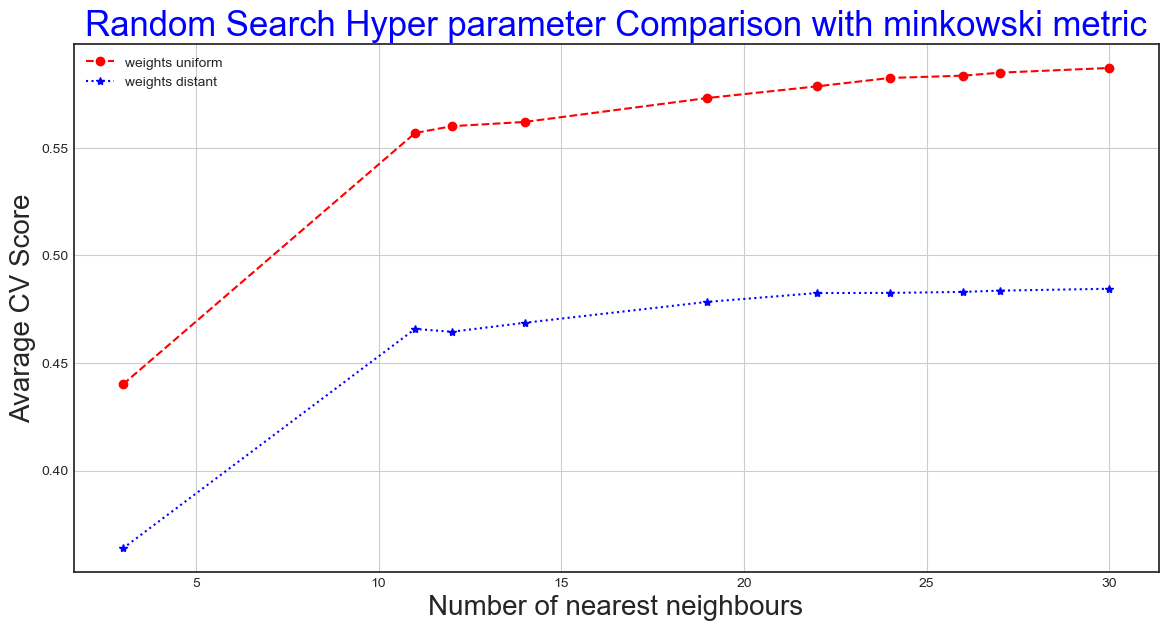

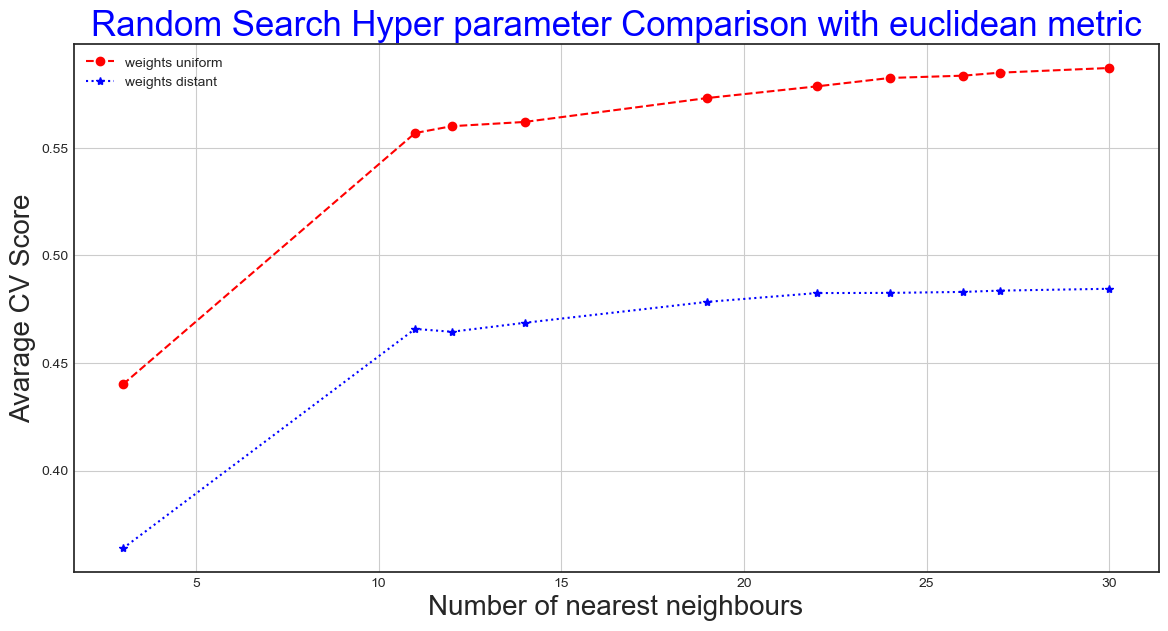

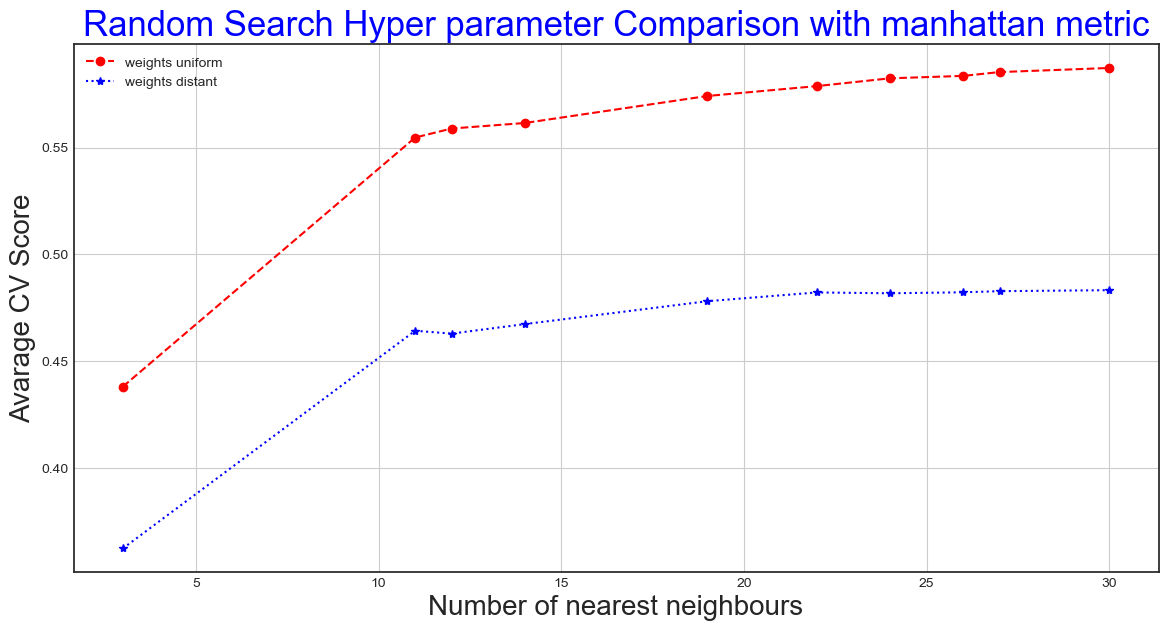

In [13]:
KNN_full_rand_search(X, y)  # performs random search.

# Over Sampled X and y values

## Random search 

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_weights  \
0       0.045085      0.011147        16.200898        0.367340       uniform   
1       0.046710      0.004250        17.096572        0.290228       uniform   
2       0.060780      0.008543        16.697803        0.815343       uniform   
3       0.058444      0.011584        15.446838        0.499660       uniform   
4       0.044442      0.004571        14.999174        0.276694       uniform   
5       0.048582      0.004181        14.948457        0.178210       uniform   
6       0.047627      0.004585        14.097585        0.135219       uniform   
7       0.054644      0.005540        15.430447        0.374839       uniform   
8       0.052210      0.001317        15.789426        0.348889       uniform   
9       0.052900      0.009871        13.677819        1.766843       uniform   

  param_n_neighbors param_metric  \
0                12    minkowski   
1                30    minkowski   


   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_weights  \
0       0.042710      0.006047        16.849967        0.526594       uniform   
1       0.042866      0.004099        16.131188        0.299051       uniform   
2       0.042683      0.003298        15.857874        0.479144       uniform   
3       0.071320      0.031677        15.685872        0.295207       uniform   
4       0.050457      0.005626        15.111973        0.267347       uniform   
5       0.048892      0.004332        15.190737        0.262934       uniform   
6       0.052730      0.007179        14.229988        0.167976       uniform   
7       0.050981      0.005647        15.128582        0.391765       uniform   
8       0.049255      0.004120        14.954477        0.298404       uniform   
9       0.053173      0.006973        13.775187        1.916728       uniform   

  param_n_neighbors param_metric  \
0                12    euclidean   
1                30    euclidean   


   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_weights  \
0       0.042229      0.006249        45.810361        2.101848       uniform   
1       0.048194      0.011036        49.801717        0.341210       uniform   
2       0.056196      0.014654        48.636927        0.701044       uniform   
3       0.049480      0.016489        54.272550        3.049665       uniform   
4       0.046975      0.007442        43.653320        0.246824       uniform   
5       0.041395      0.000991        43.791956        0.215831       uniform   
6       0.044871      0.004426        42.734156        0.142908       uniform   
7       0.045770      0.004365        44.558096        0.504941       uniform   
8       0.045359      0.007218        44.237679        0.442174       uniform   
9       0.050275      0.006515        40.190077        4.466192       uniform   

  param_n_neighbors param_metric  \
0                12    manhattan   
1                30    manhattan   


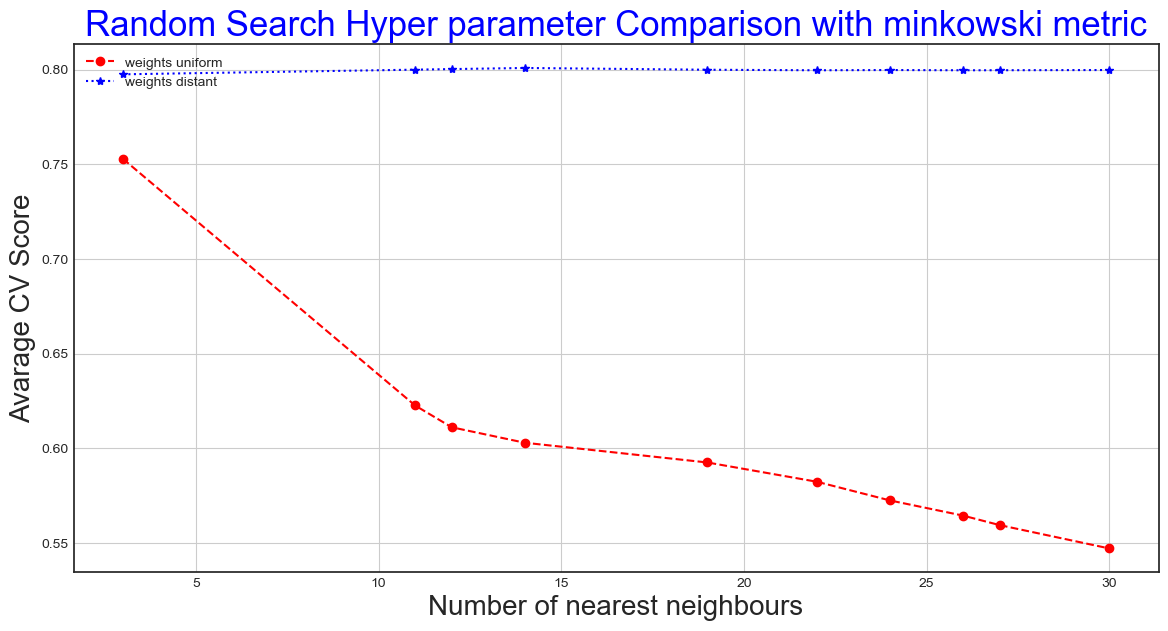

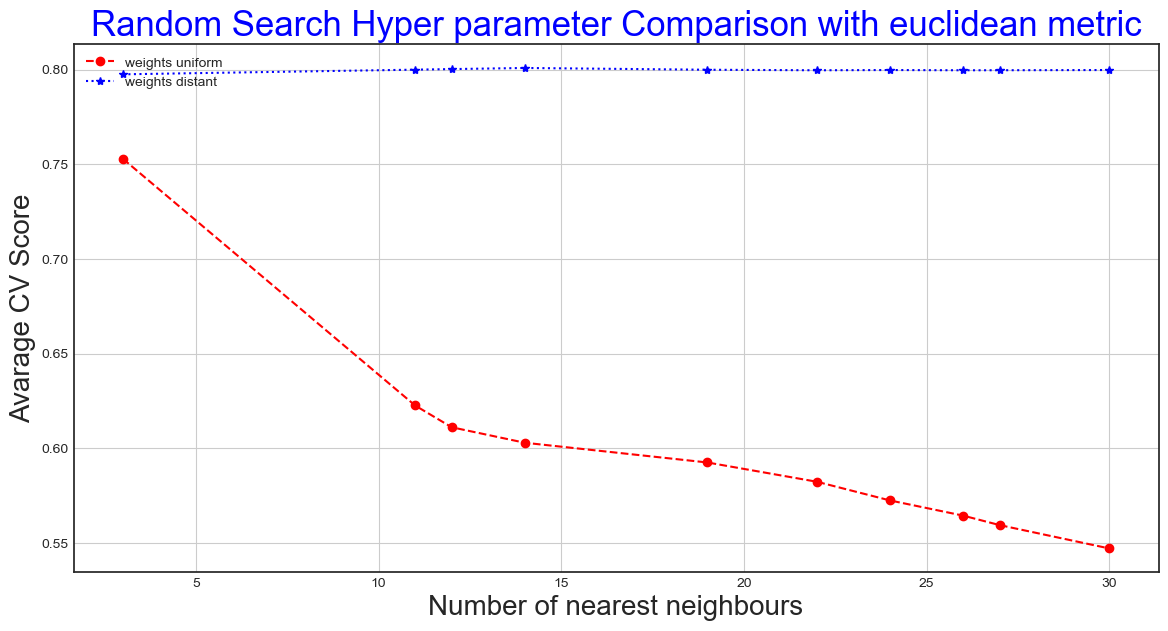

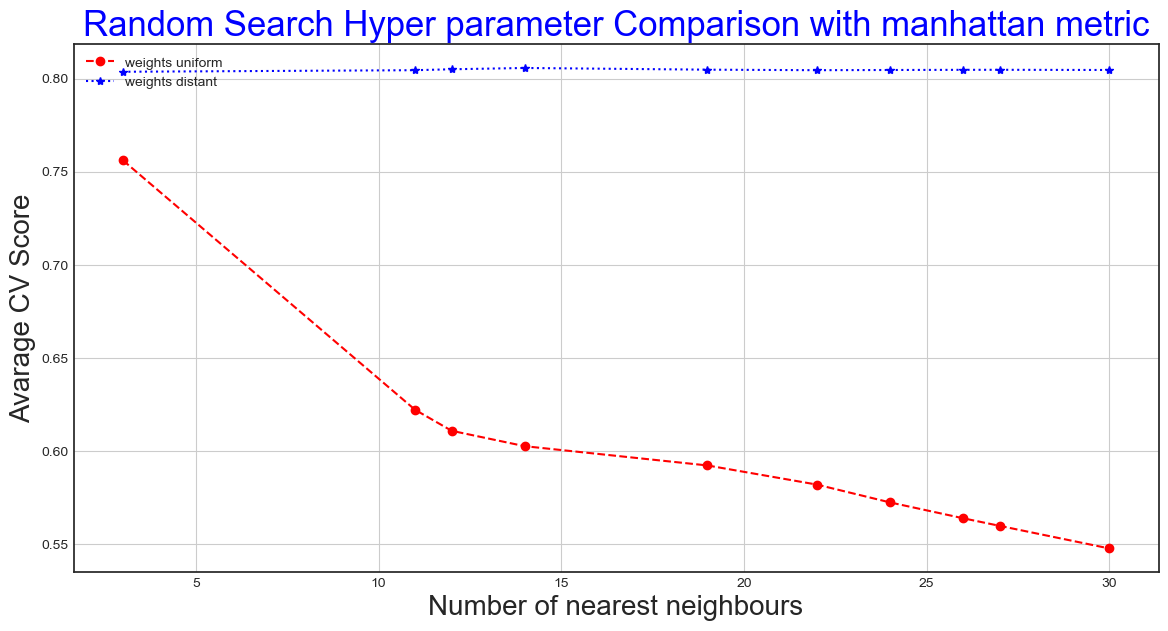

In [14]:
KNN_full_rand_search(X_over, y_over)  # performs random search.

#  X and y obtained by using Corelation matrix

## Random search 

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_weights  \
0       0.017381      0.005407         1.709867        0.052683       uniform   
1       0.010784      0.000825         1.764829        0.141645       uniform   
2       0.018537      0.008188         2.092732        0.147638       uniform   
3       0.022294      0.016270         1.979805        0.178693       uniform   
4       0.013848      0.003778         1.751706        0.075013       uniform   
5       0.022385      0.007631         1.742144        0.066886       uniform   
6       0.019902      0.008668         1.680342        0.029640       uniform   
7       0.014198      0.004981         1.932062        0.114856       uniform   
8       0.014655      0.003995         1.826789        0.121060       uniform   
9       0.014594      0.004692         1.582979        0.227249       uniform   

  param_n_neighbors param_metric  \
0                12    minkowski   
1                30    minkowski   


   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_weights  \
0       0.013404      0.006925         2.006286        0.069259       uniform   
1       0.014756      0.005759         1.993745        0.120083       uniform   
2       0.016972      0.006269         2.195605        0.041284       uniform   
3       0.014160      0.001325         1.950258        0.147372       uniform   
4       0.018665      0.003046         1.898467        0.136115       uniform   
5       0.010956      0.001007         1.707527        0.044902       uniform   
6       0.013377      0.003965         1.678621        0.043830       uniform   
7       0.017420      0.003749         1.662570        0.049193       uniform   
8       0.013781      0.004525         1.733236        0.075836       uniform   
9       0.014216      0.004986         1.688362        0.301661       uniform   

  param_n_neighbors param_metric  \
0                12    euclidean   
1                30    euclidean   


   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_weights  \
0       0.014531      0.003896         3.821686        0.063967       uniform   
1       0.013334      0.003953         3.891753        0.180678       uniform   
2       0.014567      0.003925         3.911855        0.130061       uniform   
3       0.010536      0.000847         3.793604        0.027063       uniform   
4       0.012547      0.003917         3.883267        0.154231       uniform   
5       0.015364      0.003488         4.004198        0.180604       uniform   
6       0.015781      0.003911         3.766644        0.040825       uniform   
7       0.010538      0.000836         4.033694        0.122241       uniform   
8       0.011338      0.001003         4.519084        0.340893       uniform   
9       0.013350      0.003957         3.543243        0.366367       uniform   

  param_n_neighbors param_metric  \
0                12    manhattan   
1                30    manhattan   


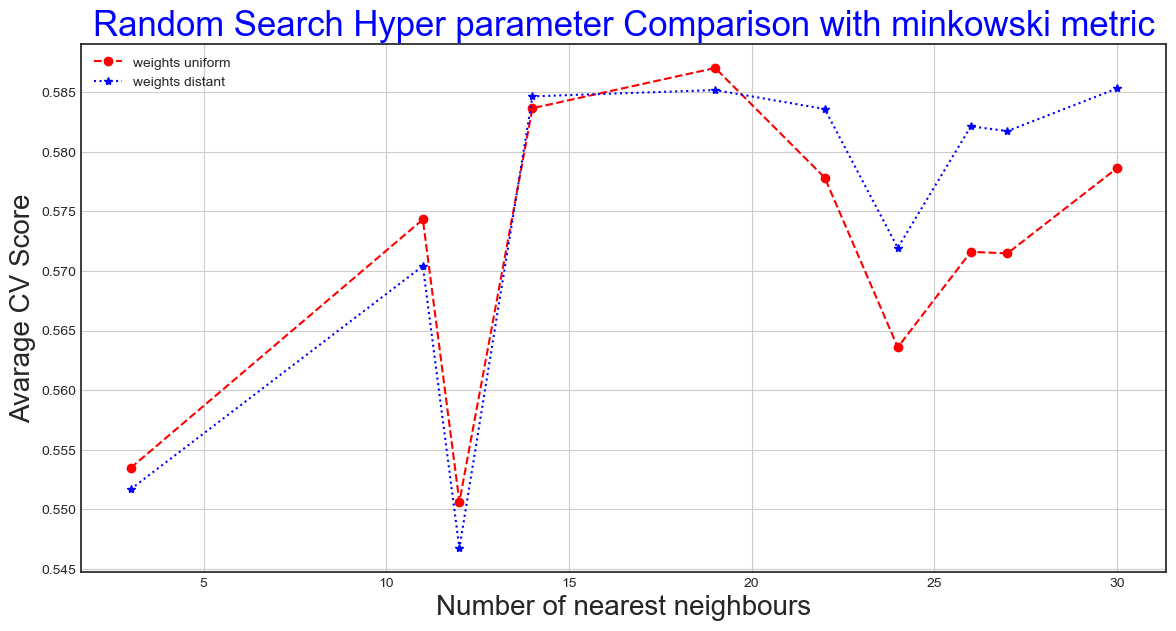

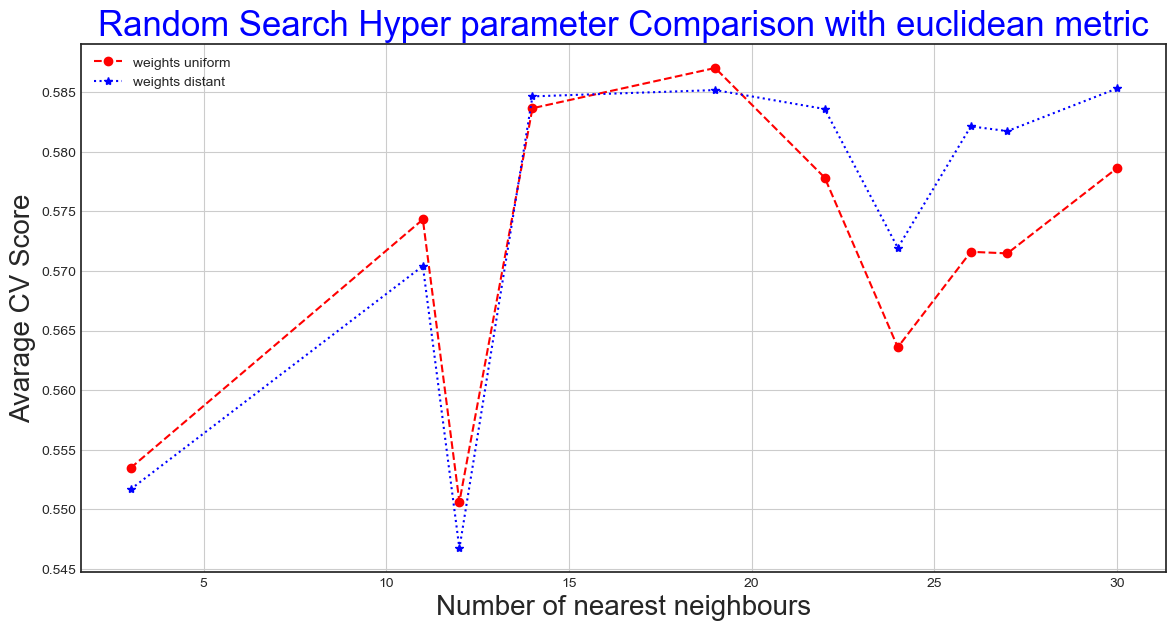

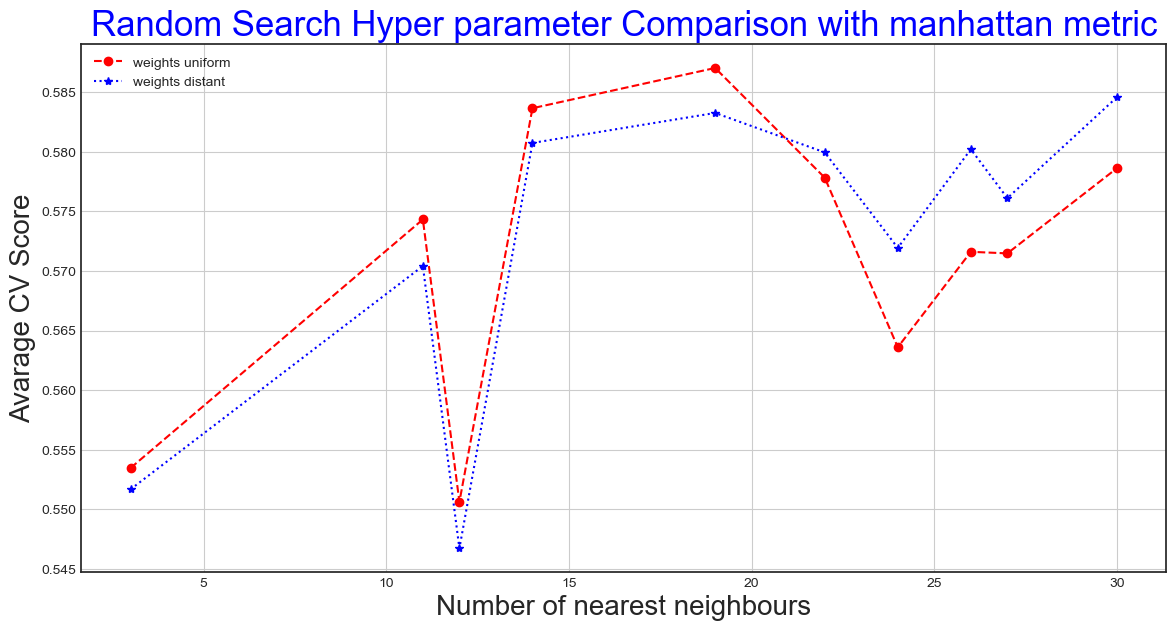

In [15]:
KNN_full_rand_search(X2, y)  # performs random search.

# Grid Search plot

In [10]:
def grid_search_plot(distance, uniform, k_list, single_val):
        print("distance ", distance)   # printing the values distace variable.

        print("uniform ", uniform)  # printing the values uniform variable.
        print("\n\n\n")

        plt.figure(dpi=100, figsize=(14, 7))  # setting the plot size
        plt.title("Grid Search Hyper parameter Comparison with " + single_val + " metric",\
              fontsize=25, color="blue")  # setting the plot title.
        plt.plot(k_list,uniform , "--", marker = "o", label="weights uniform", color="red")  # setting the uniform 
                                                      # variables values to the plot on the y axis and K_list  on the x axis.
        plt.plot(k_list,distance ,":", marker = "*", label="weights distant", color="blue")  # setting the distant 
                                                         # variables values to the plot on the y axis and K_list  on the x axis.
        plt.xlabel("Number of nearest neighbours",fontsize=20)  # Setting the x label.
        plt.ylabel("Avarage CV Score",fontsize=20)  # setting the y label.
        plt.legend(loc='lower left')  # setting the legend.
        plt.grid()  # setting a grid

# Sub function to preform Grid Search

In [11]:
def Grid_search_fun(typeofmodelandprams, dict_prams, crossval, X, y):  # Function takes in the model type,
                                                           # number of crossvalidation sand X and y values as hyperparameters.

    model = typeofmodelandprams  # creating an instance of the object.
    parameters = [dict_prams]  # hyper parameters for the grid search
    grid_search = GridSearchCV(estimator = model,  # model
                           param_grid = parameters,  # hyper paramaters 
                           scoring = 'accuracy',  # score measurement
                           cv = crossval, # number of cross validations 
                           n_jobs = -1, return_train_score=False)  # selecting all possible paramaters to go 
    # through to get the best model possible # train score is false as it can be computationaly expensive. 
    # without storing the traning score the grd search is fater
    grid_search.fit(X, y)  # applying the search on our model.
    #print(pd.DataFrame(grid_search.cv_results_)[["mean_test_score","params"]])
    print(pd.DataFrame(grid_search.cv_results_)) # to print the whole result

    best_accuracy = grid_search.best_score_  # the best accuracy 
    best_parameters = grid_search.best_params_  # the best paramaters that gave the best accurecy
    print("Best Accuracy: {:.2f} %".format(best_accuracy*100))  # printing best accuracy
    print("Best Parameters:", best_parameters)  # printing the best parameters
    


    return grid_search  # returns grid search value
    



# Performs full grid search for KNN model

In [12]:
def KNN_full_grid_search(X, y):  # Performs grid search.

        
        # Grid Search
        
        metric_list =  ['minkowski','euclidean'] 
        for single_val in metric_list:
            
            k_list = list(range(1,31))  # list from 1 - 31 (will be used as KNN's)
            weight_list = ["uniform", "distance"]  # weights list uniform and distance
            para_grid = dict(n_neighbors=k_list,weights=weight_list,metric=[single_val])  
                                                                           # adding the above lists in a dictinary.



            grid_search = Grid_search_fun(KNeighborsClassifier(n_neighbors=k_list), para_grid, 5, X, y)  # Using the grid 
                                                                                     # search function with arguments given 

            grid_search.cv_results_["mean_test_score"] # looking at mean test score

            uniform = []  # a empty list is created
            for i in range(len(grid_search.cv_results_["mean_test_score"])):  # getting all even number 
                                                                                   # indexes using a for loop.
                if grid_search.cv_results_["param_weights"][i] == "uniform":

                    uniform.append(grid_search.cv_results_["mean_test_score"][i])  # appending the unifrom values to the
                                                                                  # varibale unifrom.

            distance = []  # a empty list is created
            for i in range(len(grid_search.cv_results_["mean_test_score"])):  # getting all odd number indexes 
                                                                                   # using a for loop.
                if grid_search.cv_results_["param_weights"][i] == "distance":
                    distance.append(grid_search.cv_results_["mean_test_score"][i])  # appending the distance values to the 
                                                                                # varibale unifrom.
                        
            grid_search_plot(distance, uniform, k_list, single_val)


# X and y un_edited

## Grid Search

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
0        0.030344      0.011156         1.734191        0.033360    minkowski   
1        0.029670      0.007006         1.549530        0.039122    minkowski   
2        0.034877      0.009853         1.704314        0.140634    minkowski   
3        0.032992      0.005821         1.407112        0.032787    minkowski   
4        0.028870      0.005703         1.669195        0.031903    minkowski   
5        0.027779      0.003985         1.456634        0.033758    minkowski   
6        0.028045      0.002874         1.531014        0.010314    minkowski   
7        0.026647      0.004380         1.366009        0.037026    minkowski   
8        0.030343      0.000558         1.576995        0.065781    minkowski   
9        0.026453      0.004942         1.582971        0.093622    minkowski   
10       0.029958      0.006435         1.674236        0.151424    minkowski   
11       0.026365      0.004

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
0        0.016561      0.001828         1.649498        0.021541    euclidean   
1        0.027952      0.002948         1.434662        0.018008    euclidean   
2        0.025162      0.003882         1.634929        0.041595    euclidean   
3        0.026444      0.005241         1.420324        0.027908    euclidean   
4        0.025699      0.007641         1.886515        0.031167    euclidean   
5        0.024344      0.003400         1.622810        0.064129    euclidean   
6        0.023208      0.003707         1.607104        0.030438    euclidean   
7        0.023983      0.004450         1.442823        0.012601    euclidean   
8        0.026438      0.008058         1.624269        0.028438    euclidean   
9        0.026360      0.007094         1.458345        0.006946    euclidean   
10       0.025231      0.004278         1.593966        0.034847    euclidean   
11       0.024763      0.004

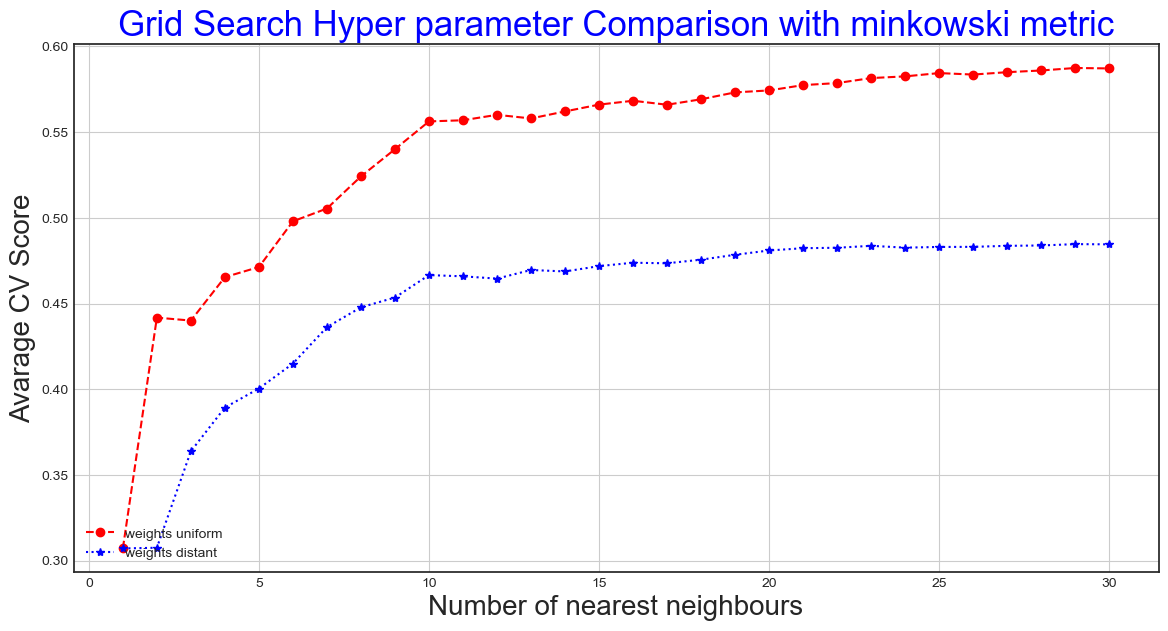

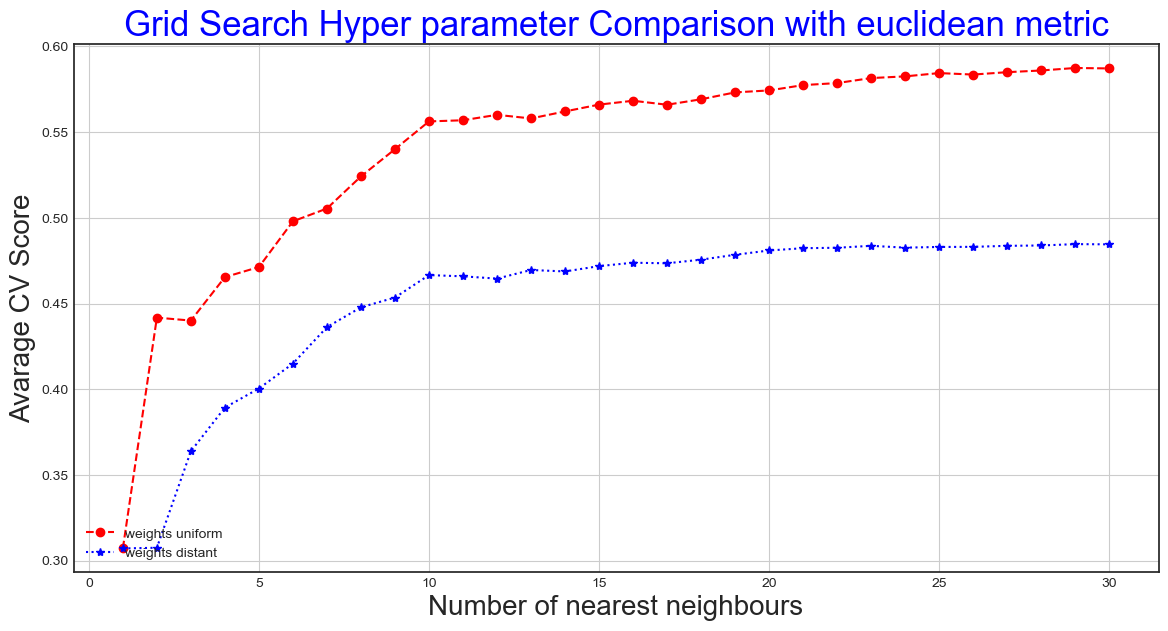

In [16]:
KNN_full_grid_search(X, y)  # performs grid search.

# Over Sampled X and y values

## Grid Search

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
0        0.049570      0.005257        13.535295        0.543660    minkowski   
1        0.042736      0.003974        13.445478        0.606350    minkowski   
2        0.054635      0.012874        13.801961        0.315273    minkowski   
3        0.051142      0.005817        13.189230        0.249399    minkowski   
4        0.045411      0.003575        15.062923        0.357389    minkowski   
5        0.048407      0.003912        13.827827        0.151752    minkowski   
6        0.055134      0.010293        15.323833        0.450084    minkowski   
7        0.055172      0.009054        14.668478        0.342868    minkowski   
8        0.054792      0.014719        15.154357        0.352171    minkowski   
9        0.048826      0.007292        14.543212        0.382551    minkowski   
10       0.053593      0.004704        15.078025        0.226491    minkowski   
11       0.052959      0.009

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
0        0.038540      0.004677        13.713061        0.355451    euclidean   
1        0.043252      0.006644        13.487868        0.644428    euclidean   
2        0.052313      0.007206        13.753768        0.232090    euclidean   
3        0.050814      0.006359        13.205073        0.172988    euclidean   
4        0.048314      0.003837        14.737972        0.183959    euclidean   
5        0.045125      0.004650        14.036501        0.083980    euclidean   
6        0.048881      0.007575        15.590708        0.313657    euclidean   
7        0.057850      0.010166        14.885185        0.392020    euclidean   
8        0.053012      0.007463        15.063569        0.362364    euclidean   
9        0.054806      0.008258        14.529367        0.484789    euclidean   
10       0.050980      0.006439        15.132373        0.188067    euclidean   
11       0.048931      0.006

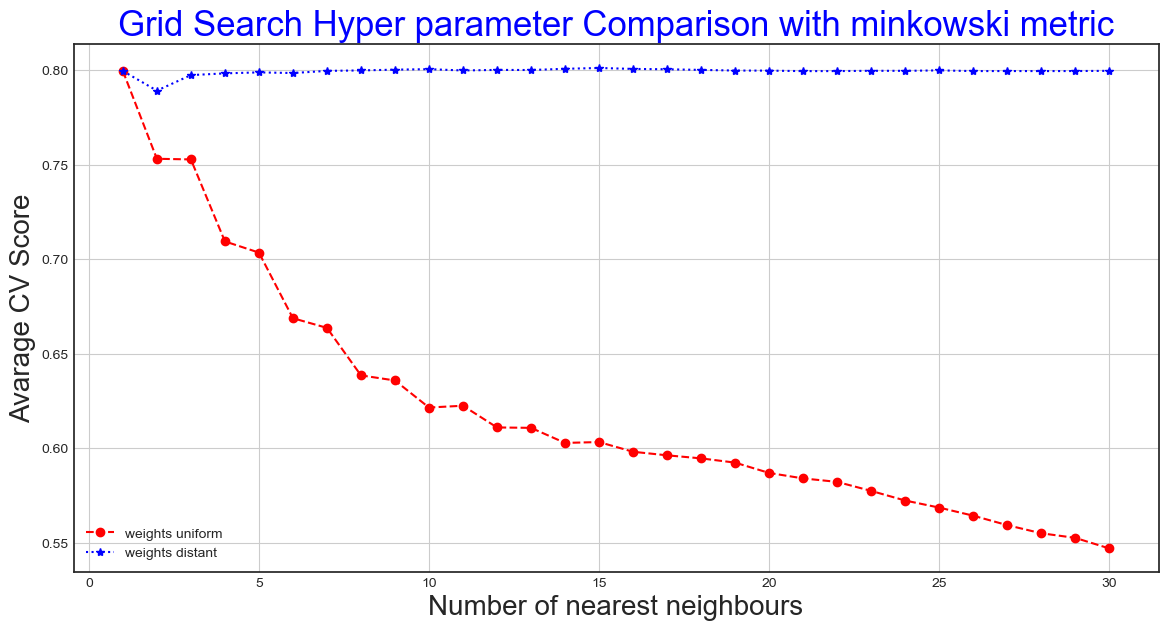

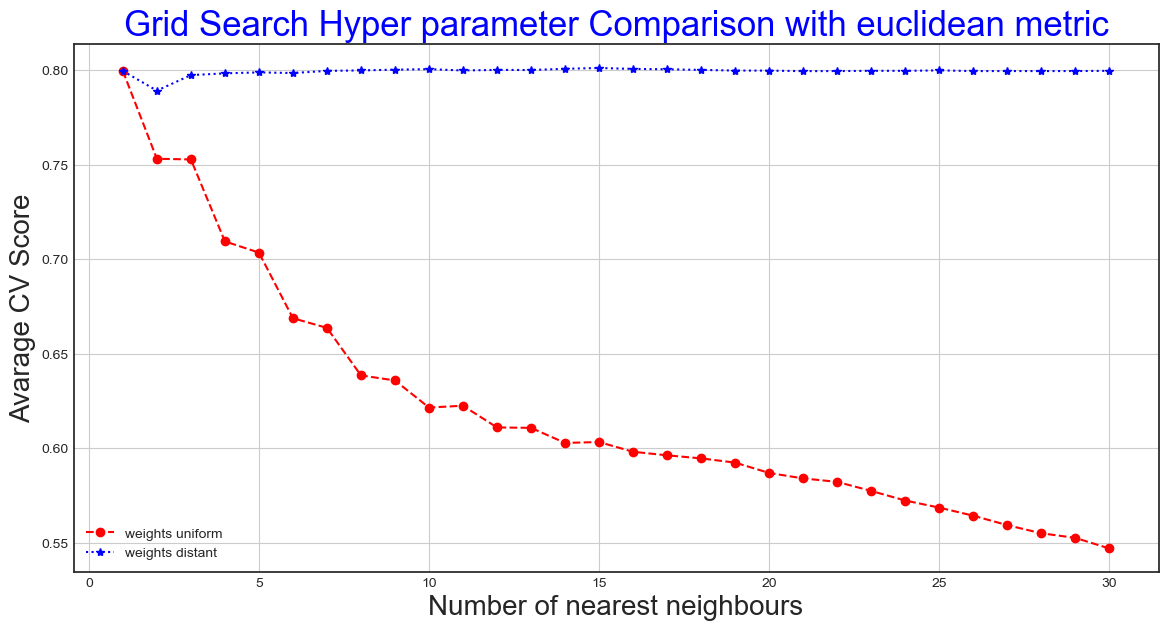

In [17]:
KNN_full_grid_search(X_over, y_over)  # performs grid search.

#  X and y obtained by using Corelation matrix

## Grid Search

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
0        0.015400      0.003877         2.116871        0.091419    minkowski   
1        0.014798      0.003869         1.623299        0.024588    minkowski   
2        0.023236      0.006205         1.792143        0.133766    minkowski   
3        0.014615      0.003403         1.526955        0.053449    minkowski   
4        0.014898      0.004090         1.833504        0.017533    minkowski   
5        0.019349      0.004823         1.587533        0.041792    minkowski   
6        0.015140      0.003640         1.823747        0.085753    minkowski   
7        0.017886      0.004921         2.069399        0.298528    minkowski   
8        0.026816      0.005146         2.315092        0.284087    minkowski   
9        0.016296      0.003687         1.485417        0.034976    minkowski   
10       0.014290      0.004284         1.625775        0.051578    minkowski   
11       0.012178      0.003

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
0        0.014968      0.005204         1.611506        0.007924    euclidean   
1        0.012162      0.004050         1.440670        0.023606    euclidean   
2        0.012191      0.004077         1.782592        0.029712    euclidean   
3        0.014184      0.004256         1.413722        0.025602    euclidean   
4        0.013884      0.003657         1.622754        0.015544    euclidean   
5        0.016316      0.007896         1.496384        0.026231    euclidean   
6        0.014174      0.004958         1.682971        0.064605    euclidean   
7        0.014189      0.004240         1.480296        0.030287    euclidean   
8        0.013774      0.004507         1.651380        0.030116    euclidean   
9        0.013806      0.003686         1.548111        0.103124    euclidean   
10       0.017426      0.007410         1.865963        0.093281    euclidean   
11       0.017410      0.003

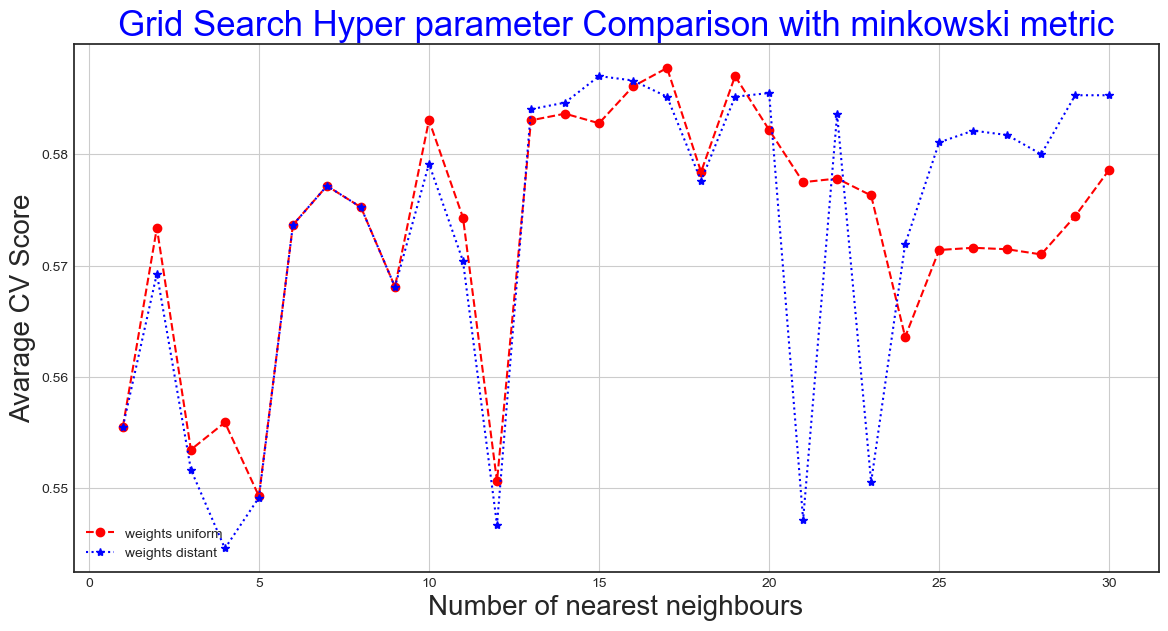

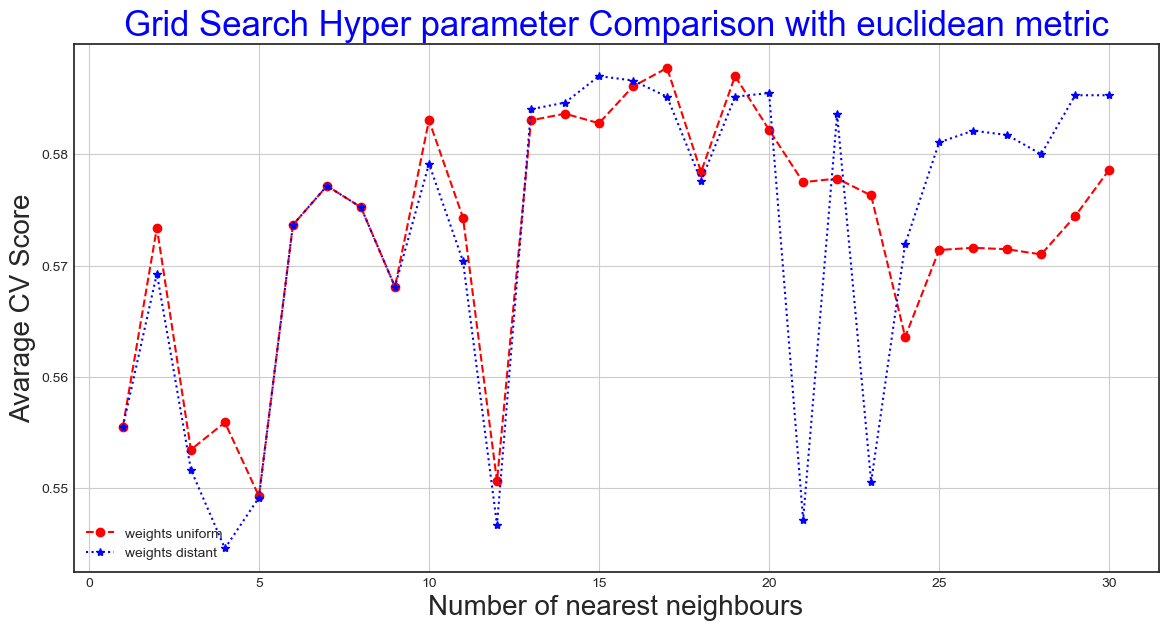

In [18]:
KNN_full_grid_search(X2, y)  # performs grid search.

# Function to evaluate different models

In [2]:
def Classifier_function(model, X_train, y_train,X_test,y_test, title):  # function takes the name of the 
                                                               # model used, the x and y traning and testing sets.
  model.fit(X_train, y_train)  # Building the k-nearest neighbors classification model.


  y_test_p = model.predict(X_test)  # Predicted results.
  print("  results\npred-Actual")  # printing predicted and real values.
  print(np.concatenate((y_test_p.reshape(len(y_test_p),1),y_test.reshape(len(y_test),1)),1))  # Predicted results and 
                                                                                       #  real results in a np array.
   

  train_accuracy = round(model.score(X_train,y_train),2) * 100  # Getting traing accuracy multipling it by 100 after 
                                                                # rounding it by 2 to get a score between 0 to 100
  test_accuracy = round(model.score(X_test,y_test),2) * 100  # Getting testing accuracy multipling it by 100 after 
                                                                # rounding it by 2 to get a score between 0 to 100

  print("Model train accuracy: ", train_accuracy, "%")  # printing the model accurcy. 
  print("Model test accuracy: ", test_accuracy, "%")  # printing the model accurcy. 


  print("\n\n")  # printing a new line.
  # getting Accuracy or recall or precision or specificity
  y_test_pred = model.predict(X_test)  # predicted results
  
  cReport = classification_report(y_test,y_test_pred)  # creating a Classification report
  print(cReport)  # creating a Classification report
  
  cm = confusion_matrix(y_test, y_test_p)  # creating the confusion matrix
  cm2 = multilabel_confusion_matrix(y_test, y_test_pred)  # creating a mutable confusion matrix


  precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_test_pred)  # getting the precision,
                                                                                          # recall and f1score for later use.
  accuracy  = round(np.trace(cm) / float(np.sum(cm)), 2) * 100  # getting aaccuracy and multipling it by 100 after 
                                                                # rounding it by 2 to get a score between 0 to 100.
  precision = round(np.mean(precision),2) * 100  # multipling precision variables mean by 100 after rounding it by
                                                #  2 to get a score between 0 to 100.
  recall = round(np.mean(recall),2) * 100  # multipling recall variables mean by 100 after rounding it by 2 to 
                                           # get a score between 0 to 100.
  f1_score = round(np.mean(f1_score),2) * 100  # multipling f1_score variables mean by 100 after rounding 
                                               # it by 2 to get a score between 0 to 100.

  lable_list = []  # creating a empty list

  for i in range(len(cm)):  # looping in the range of the length of the confusion matrix.
    for j in range(len(cm)):  # looping in the range of the length of the confusion matrix.
        if j == i:  # if the value of j is equal to the value of i.
            # the below code appends the Actual Values Classified correctly to the variable lable_list.
            lable_list.append("Actual "+ str(i) +"\n" + "calssified as "+ str(j) +"\n" + str(cm[i][j]) + "\n"+ \
                              str(round(cm[i][j]/np.sum(cm),2)) + " %")

        else:   # otherwise
            #  the below function appends the actual values classified wrongly to the variable lable list.
            lable_list.append("Actual "+ str(i) +"\n" + "calssified as "+ str(j) + "\n"  + str(cm[i][j]) + "\n"+ \
                              str(round(cm[i][j]/np.sum(cm),2)) + " %")

            
  lable_list = np.asarray(lable_list).reshape(len(cm),len(cm))  # resahping the label list as a numpy array to be 
                                                                # used in plotting the confusion matrix
  
  #  the variable function will be will be used to display the results of the evaluation to the confusion matrix.
  total_score = ("Accuracy:   " + str(accuracy) +" %" + "\nPrecison:    "  + str(precision)  +" %" + "\nRecall:        " +\
                 str(recall)  +" %" + "\nF1 score:    "  + str(f1_score) +" %") 


  # Below is the code used to plot the confusion matrix.
  plt.figure(figsize = (12,9))  # sets the size of the matrix
  disp = sns.heatmap(cm, annot=lable_list, fmt='', cmap='Blues')  # displays the results of the actual values 
                                                                 #  classified wrongly and correctly.                       
  disp.plot()  # displaying data in plot
  plt.title(title, fontsize=25)  # adding a title to plot
  plt.ylabel('True label', fontsize=20)  # adding a y axis to the plot.
  plt.xlabel('Predicted label' +"\n\nScores\n" +total_score, fontsize=20)  # adding a x axis to the plot
  plt.show()  # showing the plot


    
  result_list = train_accuracy,test_accuracy , precision, recall, f1_score  # returning the results
  y_pred_proba = model.predict_proba(X_test) 
  print("Area under the curve: ", roc_auc_score(y_test, y_pred_proba, multi_class="ovr"))


  

  return result_list  # returns the results from the model.

# Feature Scaling and testing function

In [21]:
def featurescaling(Scaler, X_train, X_test, y_train, y_test, Modelandprams ,Modelname):
    
    sucidedataframe.info()  # checking Basic information on the dataframe being procesed.
    
    sc = Scaler # creating an instance of the object.
    
    print("Before scaling:\nX_test ", X_test,"\n\nX_train ", X_train)  # printing the sets before feature scaling.

    X_train[:, 55:] = sc.fit_transform(X_train[:, 55:])  # Scaling x_train
    X_test[:,55:] = sc.transform(X_test[:, 55:])  # Scaling y_train
    
    print("After scaling:\nX_test ", X_test,"\n\nX_train ", X_train)  # printing the sets after feature scaling.
    print("\nThe result of the model")  
    Classifier_function(Modelandprams , X_train, y_train,X_test, y_test, Modelname)  
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# X and y un_edited

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

When neighbour =  1
  results
pred-Actual
[[0 0]
 [0 0]
 [0 0]
 ...
 [3 1]
 [0 0]
 [4 4]]
Model train accuracy:  100.0 %
Model test accuracy:  91.0 %



              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1838
           1       0.79      0.80      0.79       598
           2       0.85      0.80      0.83       438
           3       0.86      0.93      0.90       119
           4       0.93      0.86      0.89        29

    accuracy                           0.91      3022
   macro avg       0.88      0.87      0.87      3022
weighted avg       0.91      0.91      0.91      3022



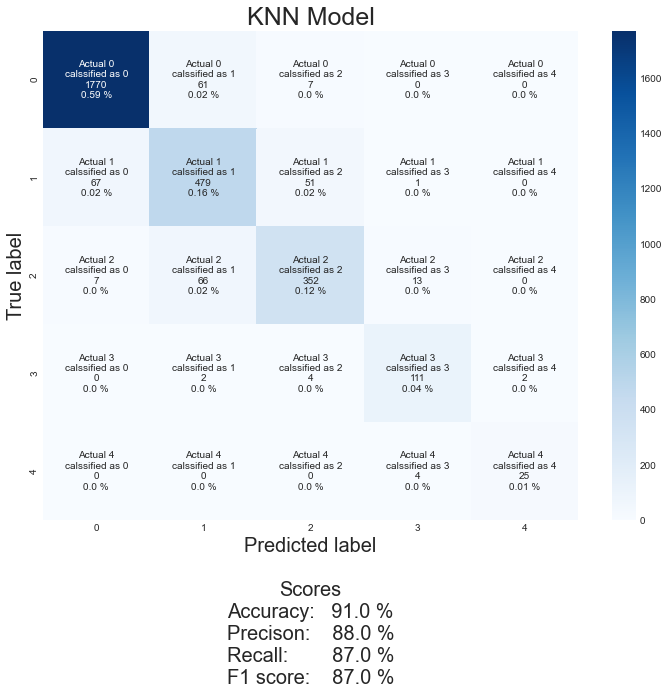

Area under the curve:  0.9215921313745132
When neighbour =  11
  results
pred-Actual
[[0 0]
 [0 0]
 [0 0]
 ...
 [2 1]
 [1 0]
 [4 4]]
Model train accuracy:  89.0 %
Model test accuracy:  87.0 %



              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1838
           1       0.77      0.73      0.75       598
           2       0.81      0.72      0.76       438
           3       0.80      0.79      0.79       119
           4       0.71      0.83      0.76        29

    accuracy                           0.87      3022
   macro avg       0.80      0.80      0.80      3022
weighted avg       0.87      0.87      0.87      3022



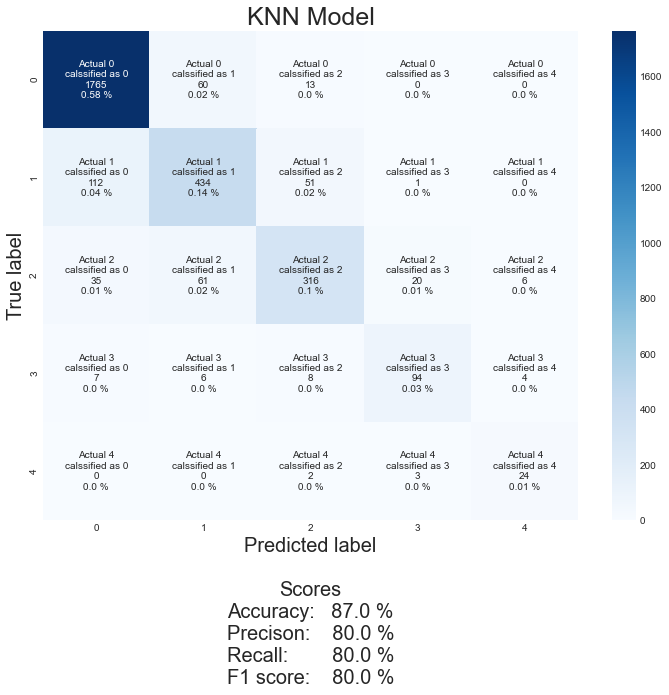

Area under the curve:  0.9731239431167591
When neighbour =  29
  results
pred-Actual
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [1 4]]
Model train accuracy:  80.0 %
Model test accuracy:  78.0 %



              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1838
           1       0.73      0.47      0.57       598
           2       0.67      0.51      0.58       438
           3       0.61      0.61      0.61       119
           4       0.58      0.38      0.46        29

    accuracy                           0.78      3022
   macro avg       0.68      0.59      0.62      3022
weighted avg       0.77      0.78      0.76      3022



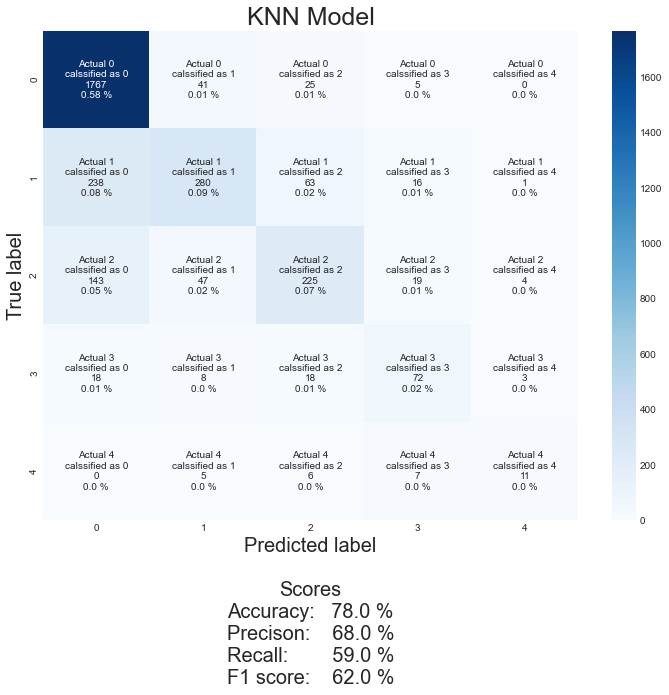

Area under the curve:  0.9384867724738907


In [49]:
for neighbour in [1, 11, 29]:
    print("When neighbour = ", neighbour)
    Classifier_function(KNeighborsClassifier(weights = 'uniform', n_neighbors = neighbour), X_train,\
                        y_train,X_test, y_test, "KNN Model")  
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# Results after feature scaling

# StandardScaler

When neighbour =  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                              

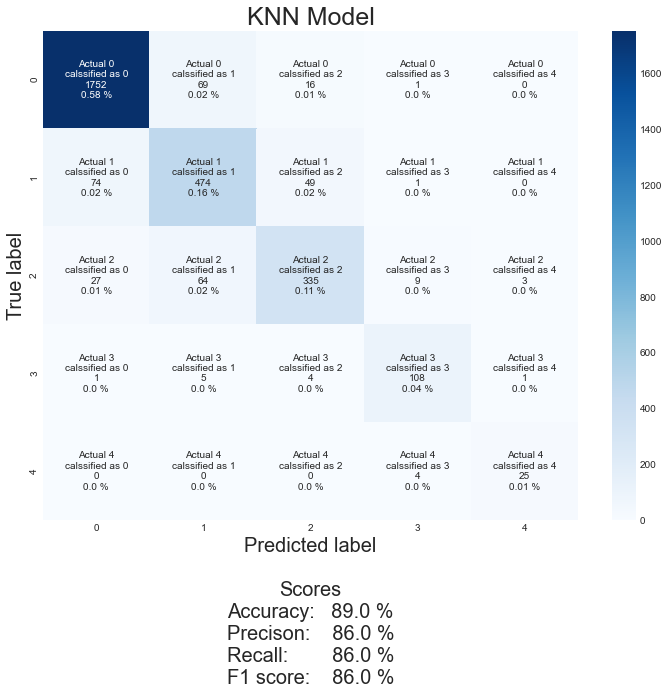

Area under the curve:  0.9104038676359225
When neighbour =  11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32 

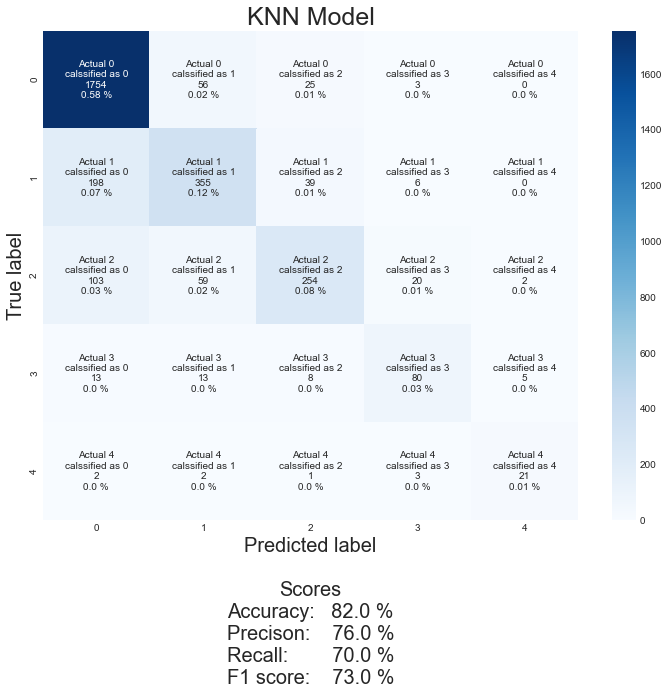

Area under the curve:  0.9496813138247389
When neighbour =  29
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32 

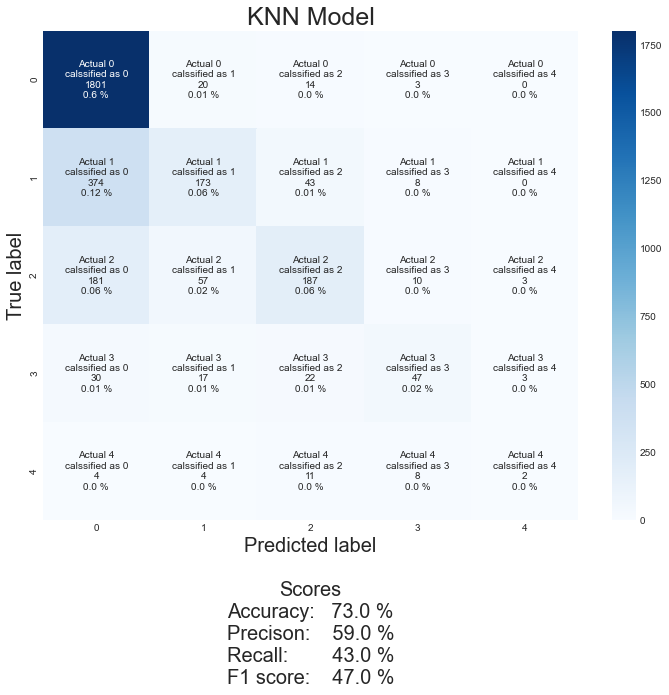

Area under the curve:  0.9221563034868602


In [55]:
for neighbour in [1, 11, 29]:
    print("When neighbour = ", neighbour)
    featurescaling(StandardScaler(), X_train, X_test, y_train, y_test,\
                   KNeighborsClassifier(weights = 'uniform', n_neighbors = neighbour) ,"KNN Model")

    # performs standard scaling
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

When neighbour =  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                              

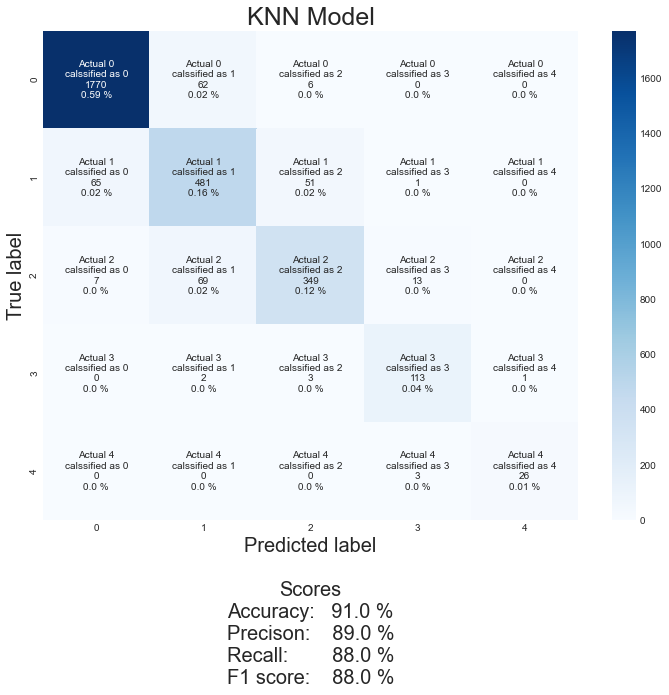

Area under the curve:  0.9265197563739316
When neighbour =  11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32 

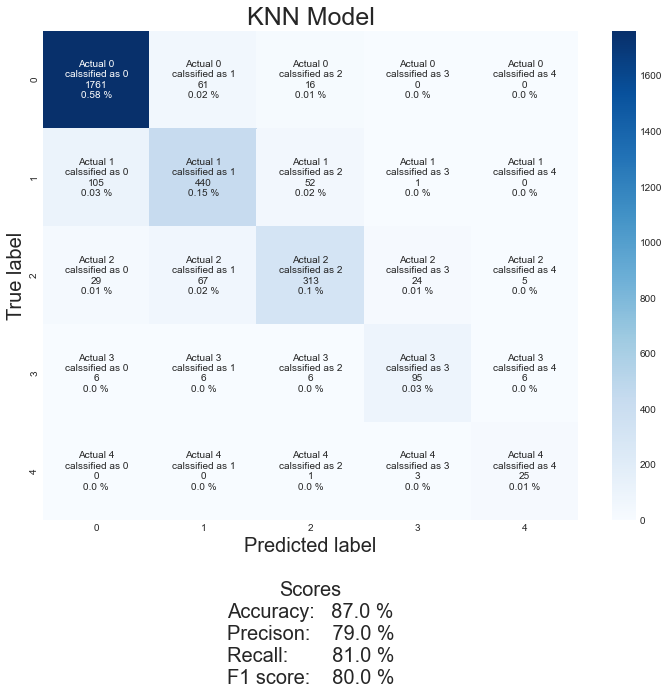

Area under the curve:  0.9734296766060927
When neighbour =  29
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32 

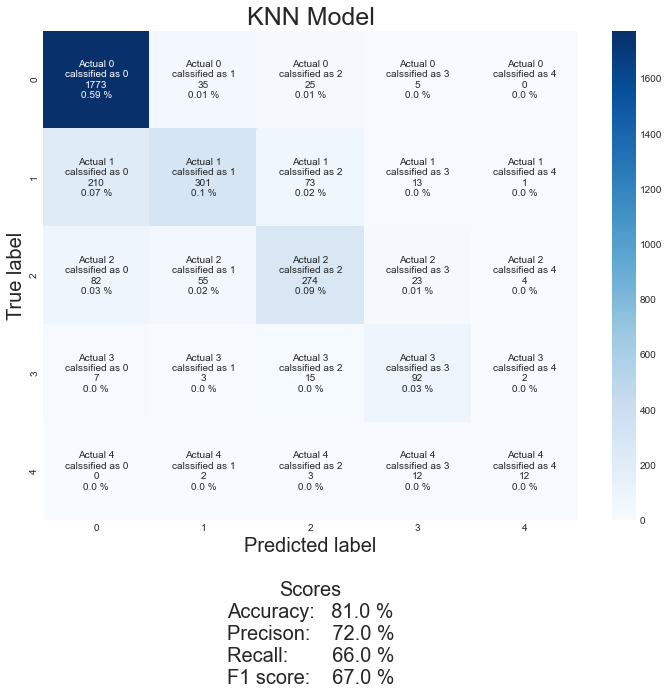

Area under the curve:  0.9489126673174768


In [56]:
for neighbour in [1, 11, 29]:
    print("When neighbour = ", neighbour)
    featurescaling(MinMaxScaler(), X_train, X_test, y_train, y_test,\
                   KNeighborsClassifier(weights = 'uniform', n_neighbors = neighbour) ,"KNN Model")
    # performs Minmax scaling
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# RobustScaler

When neighbour =  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                              

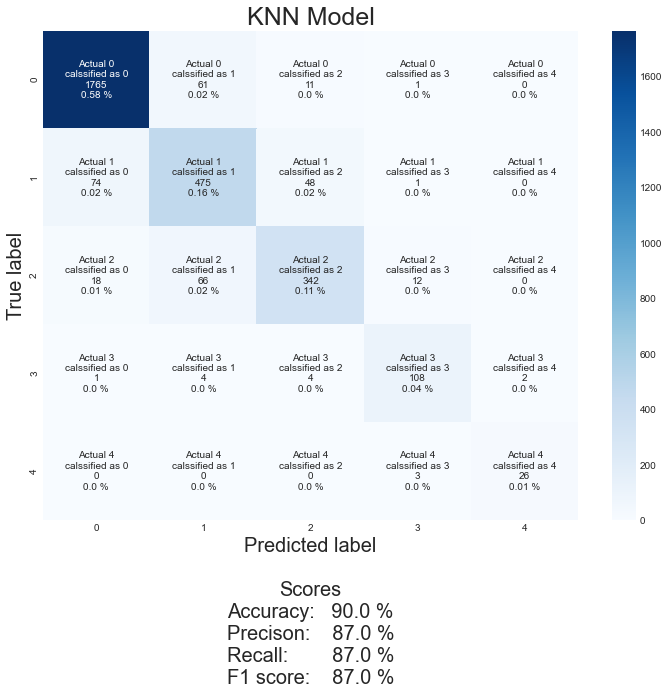

Area under the curve:  0.9176038721215706
When neighbour =  11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32 

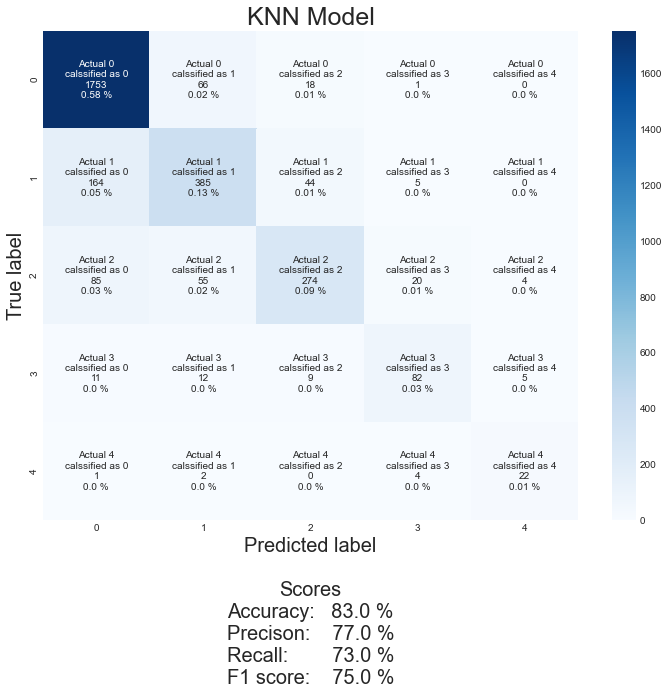

Area under the curve:  0.9565381882269373
When neighbour =  29
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32 

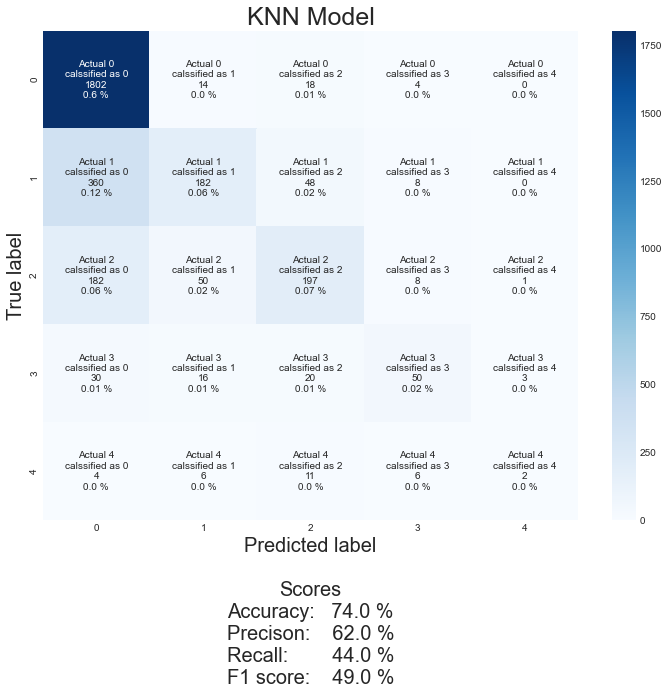

Area under the curve:  0.9241424724219369


In [57]:
for neighbour in [1, 11, 29]:
    print("When neighbour = ", neighbour)
    featurescaling(RobustScaler(), X_train, X_test, y_train, y_test,\
                   KNeighborsClassifier(weights = 'uniform', n_neighbors = neighbour) ,"KNN Model")
    # performs robust scaling 
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# Normalizer

When neighbour =  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                              

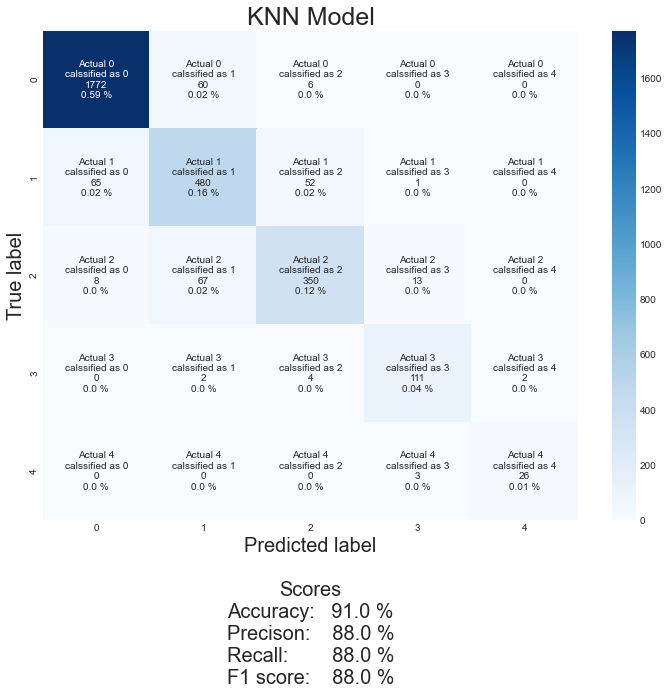

Area under the curve:  0.924978730823591
When neighbour =  11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  

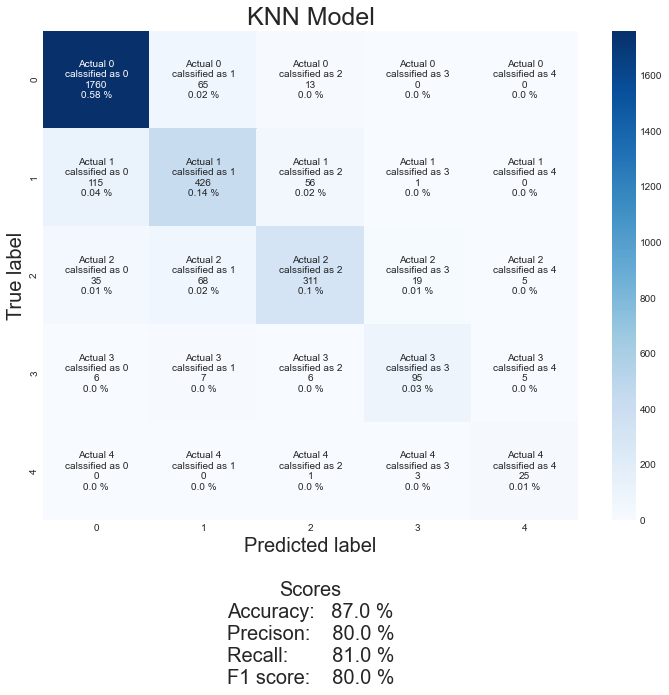

Area under the curve:  0.97225176945521
When neighbour =  29
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  


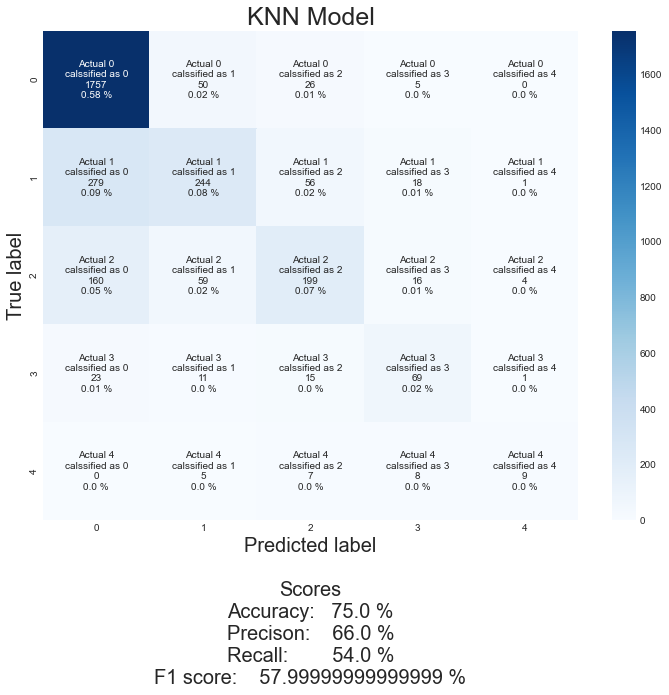

Area under the curve:  0.9311849280770573


In [58]:
for neighbour in [1, 11, 29]:
    print("When neighbour = ", neighbour)
    featurescaling(Normalizer(), X_train, X_test, y_train, y_test,\
                   KNeighborsClassifier(weights = 'uniform', n_neighbors = neighbour) ,"KNN Model")
    # Performs normalization scaling 
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# Over Sampled X and y values

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

When neighbour =  1
  results
pred-Actual
[[3 3]
 [4 4]
 [2 2]
 ...
 [2 2]
 [3 3]
 [0 0]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1942
           1       0.95      0.99      0.97      1840
           2       0.99      0.99      0.99      1760
           3       1.00      1.00      1.00      1859
           4       1.00      1.00      1.00      1863

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



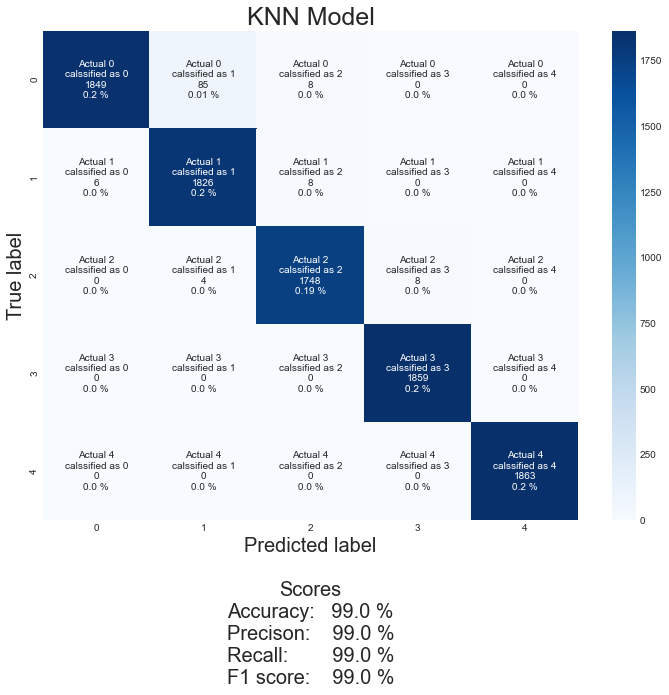

Area under the curve:  0.9921664206004255
When neighbour =  3
  results
pred-Actual
[[3 3]
 [4 4]
 [2 2]
 ...
 [2 2]
 [3 3]
 [0 0]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1942
           1       0.95      0.99      0.97      1840
           2       0.99      0.99      0.99      1760
           3       1.00      1.00      1.00      1859
           4       1.00      1.00      1.00      1863

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



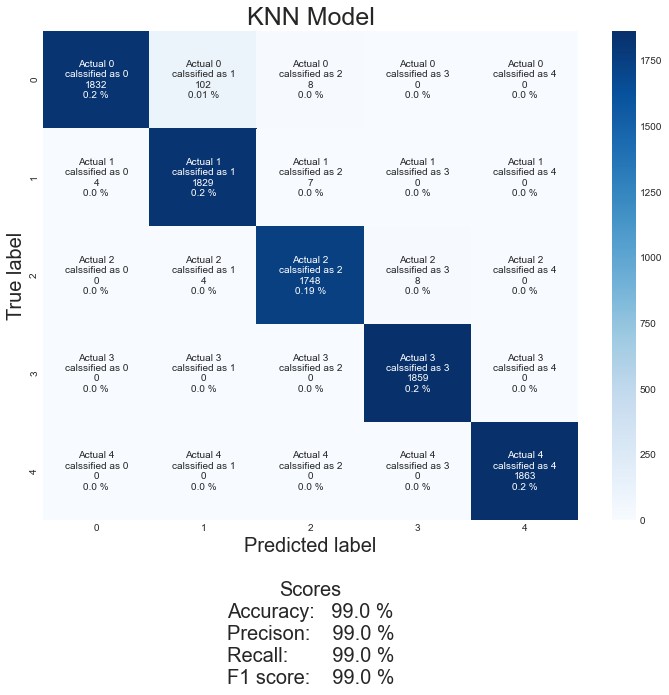

Area under the curve:  0.9941775277609495
When neighbour =  15
  results
pred-Actual
[[3 3]
 [4 4]
 [2 2]
 ...
 [2 2]
 [3 3]
 [0 0]]
Model train accuracy:  100.0 %
Model test accuracy:  98.0 %



              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1942
           1       0.93      0.99      0.96      1840
           2       0.99      0.99      0.99      1760
           3       0.99      1.00      1.00      1859
           4       1.00      1.00      1.00      1863

    accuracy                           0.98      9264
   macro avg       0.98      0.98      0.98      9264
weighted avg       0.98      0.98      0.98      9264



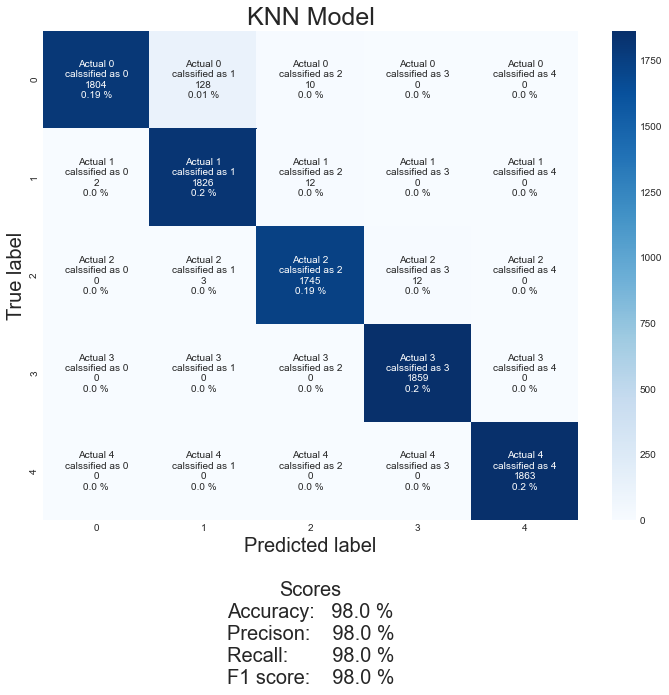

Area under the curve:  0.9985649001220974


In [60]:
for neighbour in [1, 3, 15]:
    print("When neighbour = ", neighbour)
    Classifier_function(KNeighborsClassifier(n_neighbors = neighbour, weights ='distance'), X_train_over,\
                    y_train_over, X_test_over, y_test_over, "KNN Model")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Feature scaling

# StandardScaler

When neighbour =  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                              

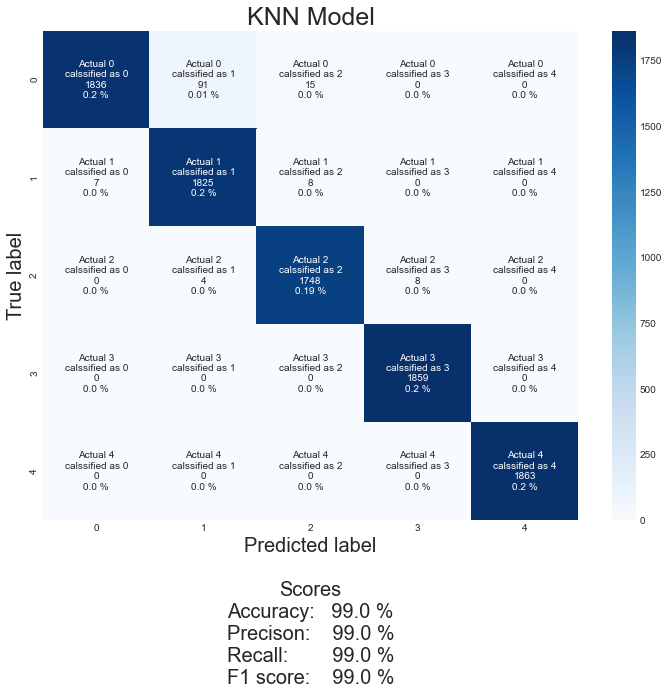

Area under the curve:  0.9912548997797822
When neighbour =  3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  

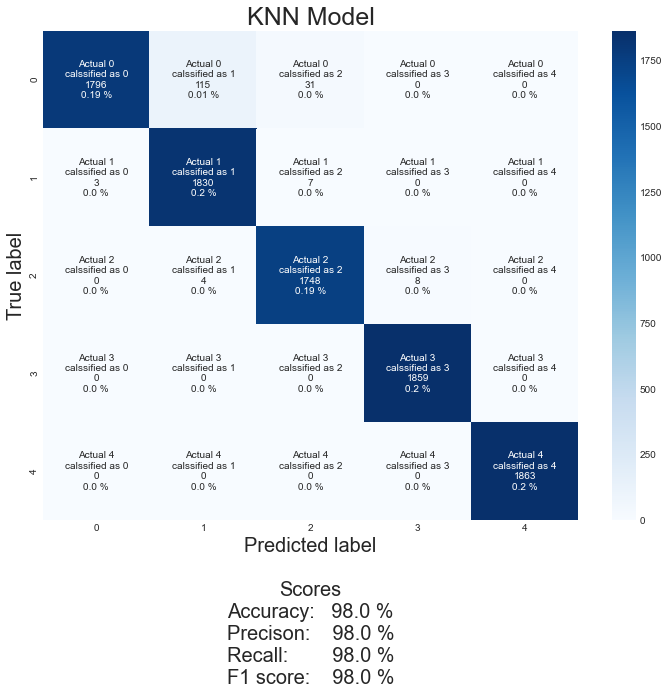

Area under the curve:  0.9935067340470415
When neighbour =  15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32 

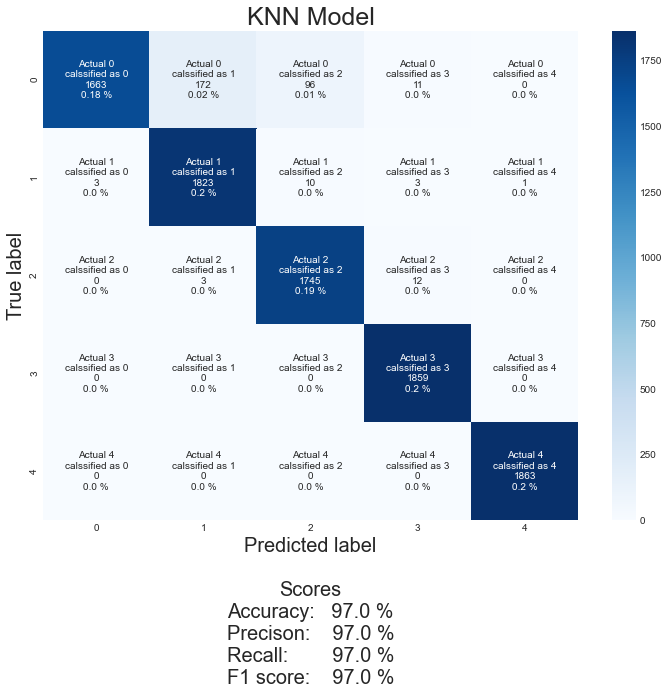

Area under the curve:  0.9984146677497291


In [61]:
for neighbour in [1, 3, 15]:
    print("When neighbour = ", neighbour)
    featurescaling(StandardScaler(), X_train_over, X_test_over, y_train_over, y_test_over,\
               KNeighborsClassifier(n_neighbors = neighbour, weights ='distance') ,"KNN Model")

# performs standard scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

In [66]:
print(max(0.9941775277609495, 0.9912548997797822))

0.9941775277609495


# MinMaxScaler

When neighbour =  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                              

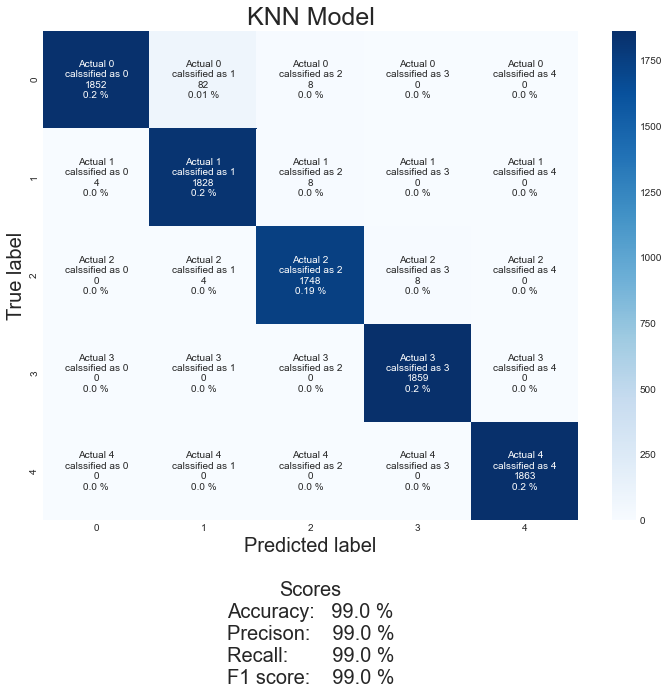

Area under the curve:  0.9924973205942415
When neighbour =  3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  

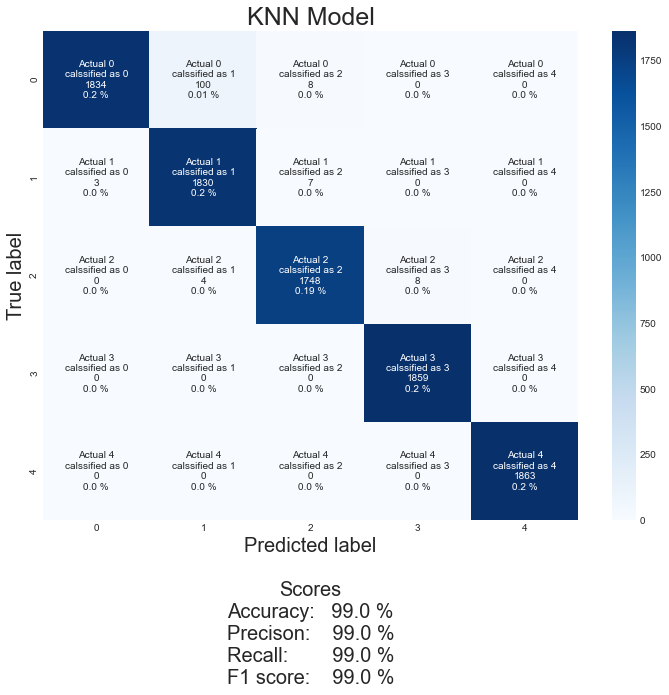

Area under the curve:  0.994235518162126
When neighbour =  15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  

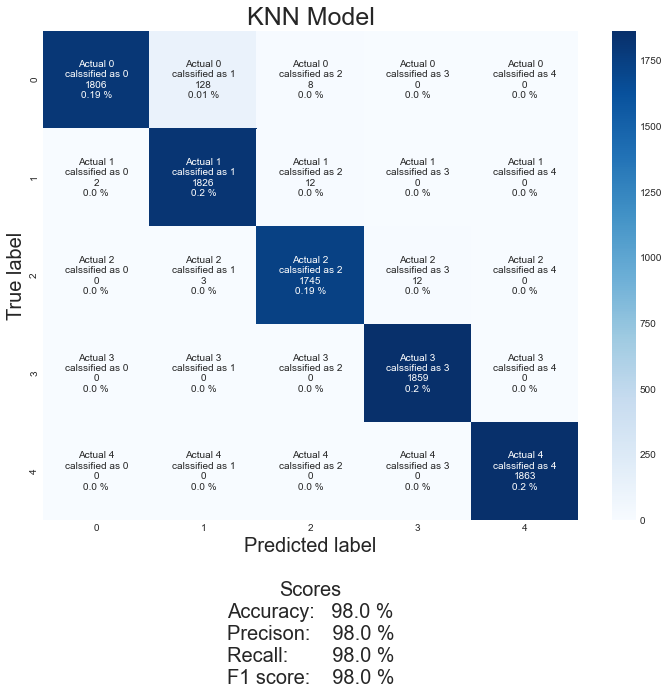

Area under the curve:  0.9985582816368105


In [62]:
for neighbour in [1, 3, 15]:
    print("When neighbour = ", neighbour)
    featurescaling(MinMaxScaler(), X_train_over, X_test_over, y_train_over, y_test_over,\
               KNeighborsClassifier(n_neighbors = neighbour, weights ='distance') ,"KNN Model")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

In [67]:
print(max(0.9941775277609495, 0.994235518162126))

0.994235518162126


# RobustScaler

When neighbour =  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                              

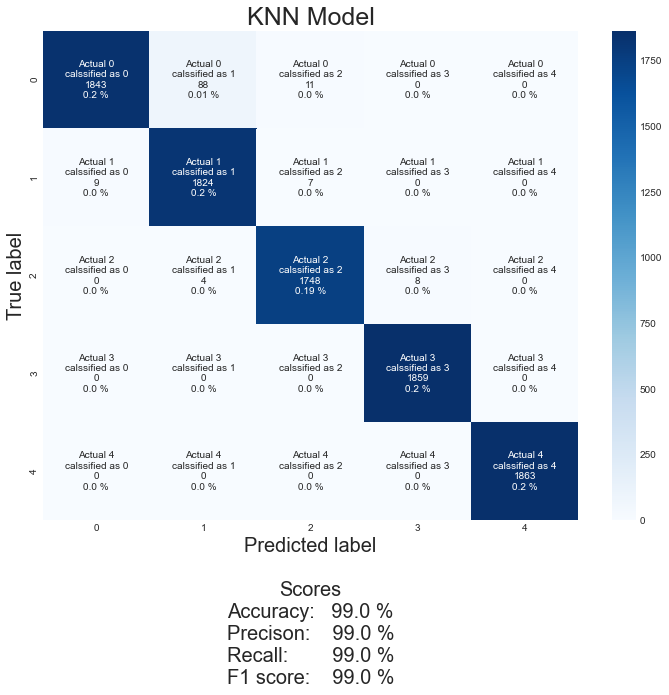

Area under the curve:  0.9916407307663366
When neighbour =  3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  

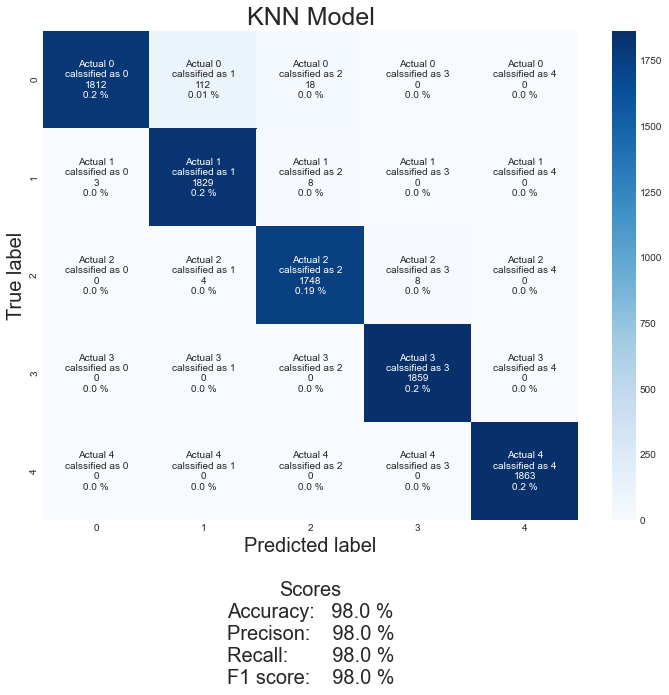

Area under the curve:  0.993514138546735
When neighbour =  15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  

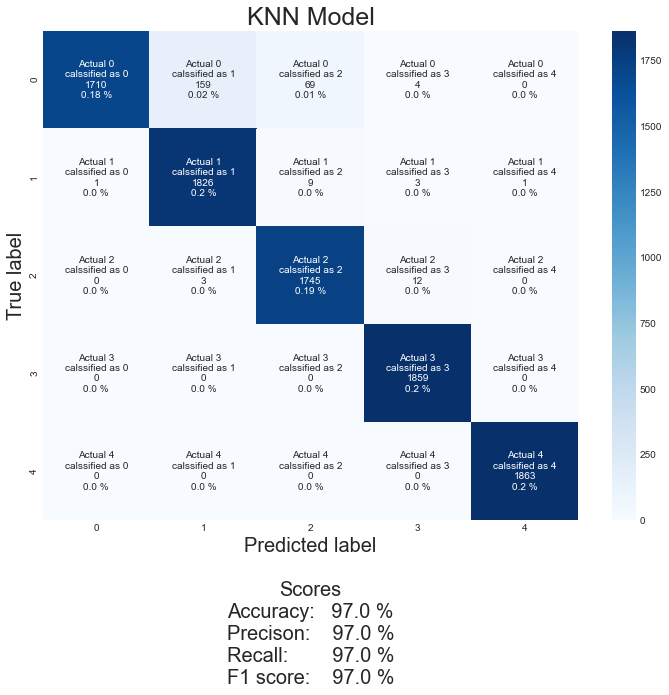

Area under the curve:  0.9985019358413446
0.994235518162126


In [68]:
for neighbour in [1, 3, 15]:
    print("When neighbour = ", neighbour)
    featurescaling(RobustScaler(), X_train_over, X_test_over, y_train_over, y_test_over,\
               KNeighborsClassifier(n_neighbors = neighbour, weights ='distance') ,"KNN Model")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score


In [69]:
print(max(0.9917795958800001, 0.994235518162126))

0.994235518162126


# Normalizer

When neighbour =  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                              

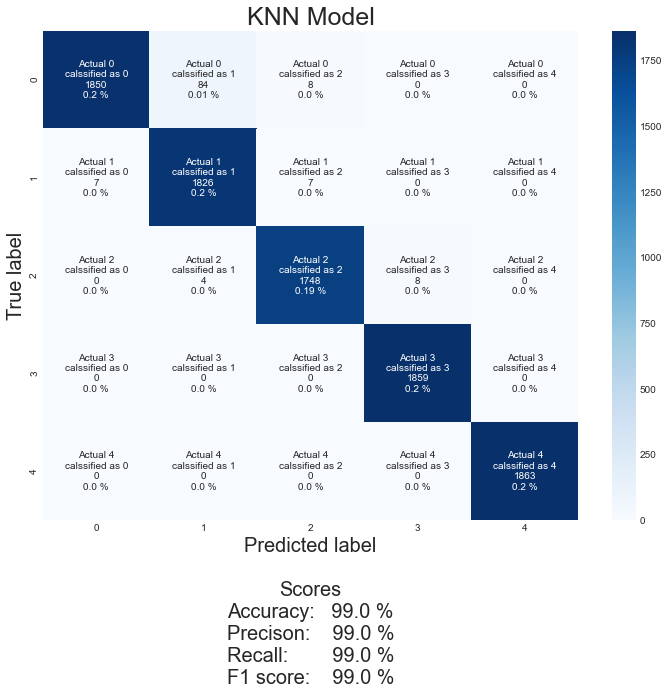

Area under the curve:  0.9922310524892582
When neighbour =  3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  

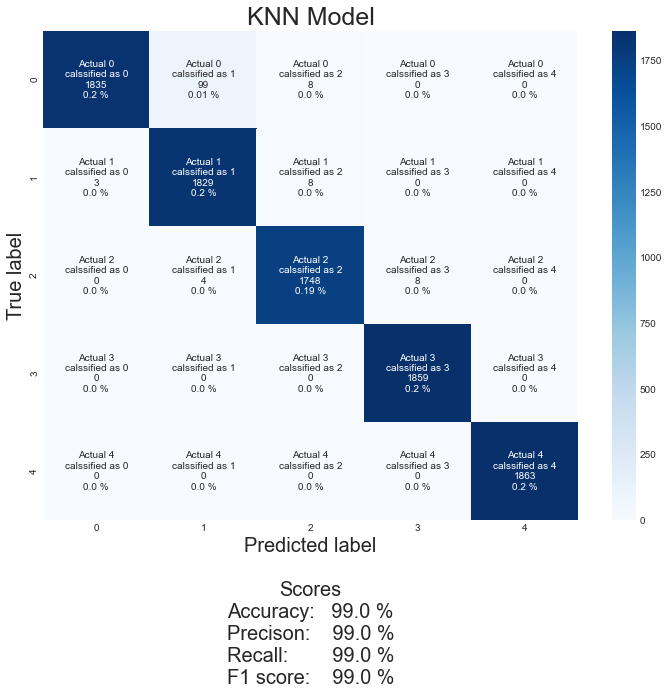

Area under the curve:  0.9940531042975905
When neighbour =  15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32 

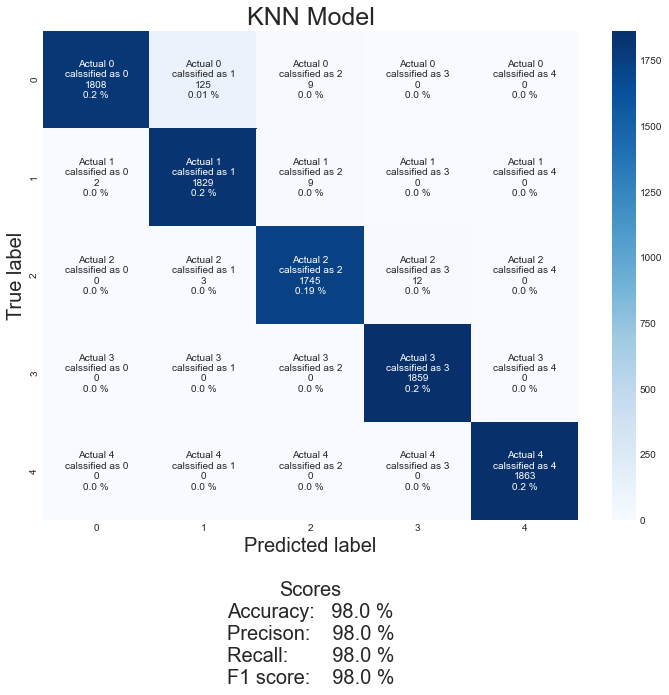

Area under the curve:  0.9985636920907869


In [64]:
for neighbour in [1, 3, 15]:
    print("When neighbour = ", neighbour)  
    featurescaling(Normalizer(), X_train_over, X_test_over, y_train_over, y_test_over,\
               KNeighborsClassifier(n_neighbors = neighbour, weights ='distance') ,"KNN Model")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

In [70]:
print(max(0.9940531042975905, 0.994235518162126))

0.994235518162126


#  X and y obtained by using Corelation matrix

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
for neighbour in [17,19]:
    print("When neighbour = ", neighbour)
    Classifier_function(KNeighborsClassifier(n_neighbors = neighbour, weights = "uniform"), X2_train, y2_train,\
                    X2_test, y2_test, "KNN Model")
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Best Score and model

# Over Sampled X and y values

# MinMaxScaler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                                                15

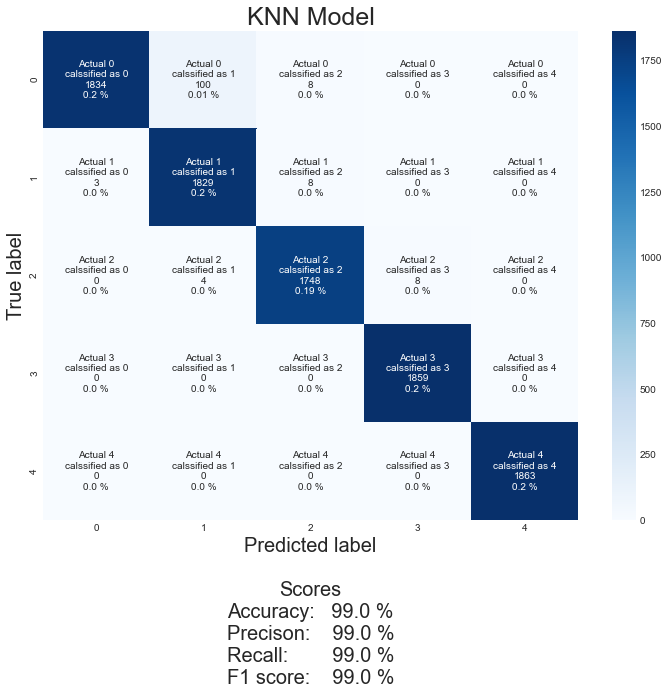

Area under the curve:  0.9942237124129848


In [83]:
featurescaling(MinMaxScaler(), X_train_over, X_test_over, y_train_over, y_test_over,\
           KNeighborsClassifier(n_neighbors = 3, weights ='distance') ,"KNN Model")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Checking Best Results with different Random_states

In [28]:
def model_evaluation():
    
    train_accuracy_list = []
    test_accuracy_list = []
    precision_list = []
    recall_list =[]
    f1_score_list =[]

    for random_num in [1,7,26,14,66]:
        for nested_random_num in [1,7,26,14,66]:
            print("when Random state = ", random_num)
            print("when Random state2 = ", nested_random_num)
            print('Original dataset shape %s' % Counter(y))  # original data set rows counted

            ros = RandomOverSampler(random_state=random_num)  # instance of object created.
            X_over, y_over = ros.fit_resample(X, y)  # oversampling model fitting
            print('Resampled dataset shape %s' % Counter(y_over))  # oversampled data set rows counted

            X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, \
                                                                y_over, test_size = 0.2, random_state = nested_random_num)
            # test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                                        # to get the best results.                                                           
            # random_state = 1         # resetting the  random seed
            
            sc = MinMaxScaler() # creating an instance of the object.

            print("Before scaling:\nX_test ", X_test_over,"\n\nX_train ", X_train_over)  # printing the sets before feature scaling.

            X_train_over[:, 55:] = sc.fit_transform(X_train_over[:, 55:])  # Scaling x_train
            X_test_over[:,55:] = sc.transform(X_test_over[:, 55:])  # Scaling y_train

            print("After scaling:\nX_test ", X_test_over,"\n\nX_train ", X_train_over)  # printing the sets after feature scaling.
            print("\nThe result of the model")  
            

            
            train_accuracy,test_accuracy , precision, recall, f1_score = \
            Classifier_function(KNeighborsClassifier(n_neighbors = 3, weights ='distance'), X_train_over,\
                 y_train_over, X_test_over, y_test_over, "KNN Model")  
            # performs Minmax scaling
            # Performs traing, testing prediction.
            # performs precision, recall, f1-score and support prediction
            # plots a confusion matrix
            # returns the traing, testing, precision, recall, f1-score

            
            train_accuracy_list.append(train_accuracy)
            test_accuracy_list.append(test_accuracy)
            precision_list.append(precision)
            recall_list.append(recall)
            f1_score_list.append(f1_score)
            
            
    print("\n\nTrain Accuracy ", np.mean(train_accuracy_list),"%")
    print("Standard Deviation: ", np.std(train_accuracy_list),"%")  # standard deveation printed (std -avarage or std+ avarage )
    print("\nTest Accuracy ", np.mean(test_accuracy_list),"%") 
    print("Standard Deviation: ", np.std(test_accuracy_list),"%")  # standard deveation printed (std -avarage or std+ avarage )
    print("\nprecision ", np.mean(precision_list),"%")
    print("Standard Deviation: ", np.std(precision_list),"%")  # standard deveation printed (std -avarage or std+ avarage )
    print("\nrecall ", np.mean(recall_list),"%") 
    print("Standard Deviation: ", np.std(recall_list),"%")  # standard deveation printed (std -avarage or std+ avarage )
    print("\nf1_score ", np.mean(f1_score_list),"%") 
    print("Standard Deviation: ", np.std(f1_score_list),"%")  # standard deveation printed (std -avarage or std+ avarage )
            

In [5]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                                                15

when Random state =  1
when Random state2 =  1
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.64687718e+01
  1.80745977e+00 5.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.80144659e+01
  3.00000000e+00 9.77000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.01091924e+01
  1.80745977e+00 6.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.11957117e+01
  2.84280000e+00 6.58610000e+04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.09832874e+01
  3.79300000e+00 9.87000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+0

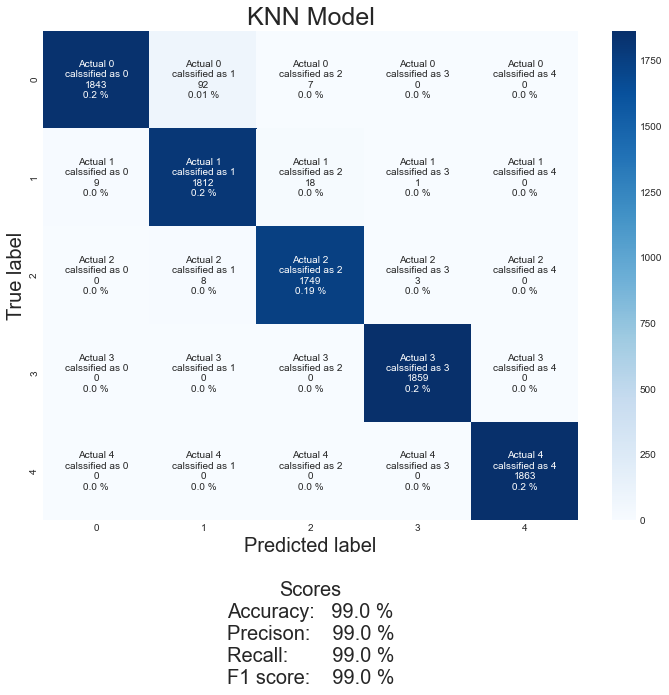

Area under the curve:  0.9938147223779792
when Random state =  1
when Random state2 =  7
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.30166253e+01
  1.80745977e+00 8.95790000e+04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.43177307e+01
  3.70000000e+00 1.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.41951596e+01
  3.67460000e+00 1.01000000e+02]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.68071278e+01
  3.64830000e+00 6.22000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.07535079e+01
  1.80745977e+00 9.53000000e+02]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.000

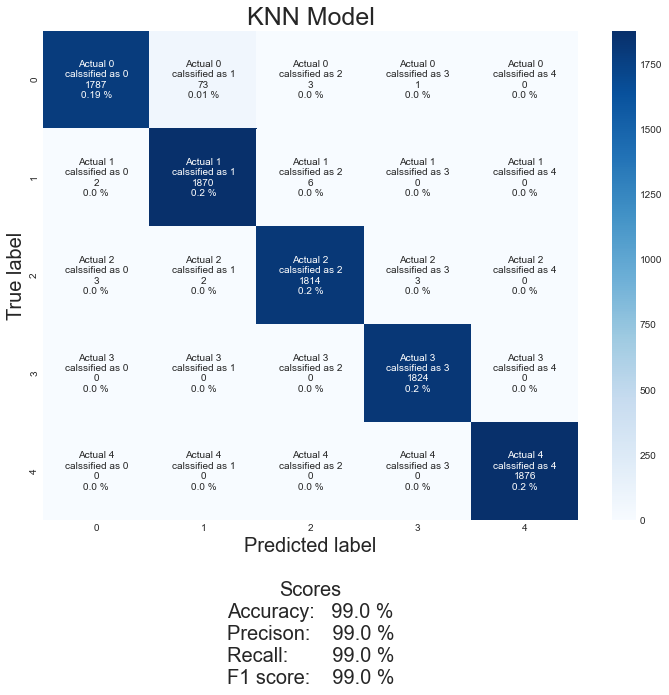

Area under the curve:  0.9963517826757518
when Random state =  1
when Random state2 =  26
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...   27.84774971
     3.483       129.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...   19.6165586
     3.449      3122.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...   42.86496326
     3.9          13.        ]] 

X_train  [[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...  42.30401227   4.2
  164.        ]
 [  0.           0.   

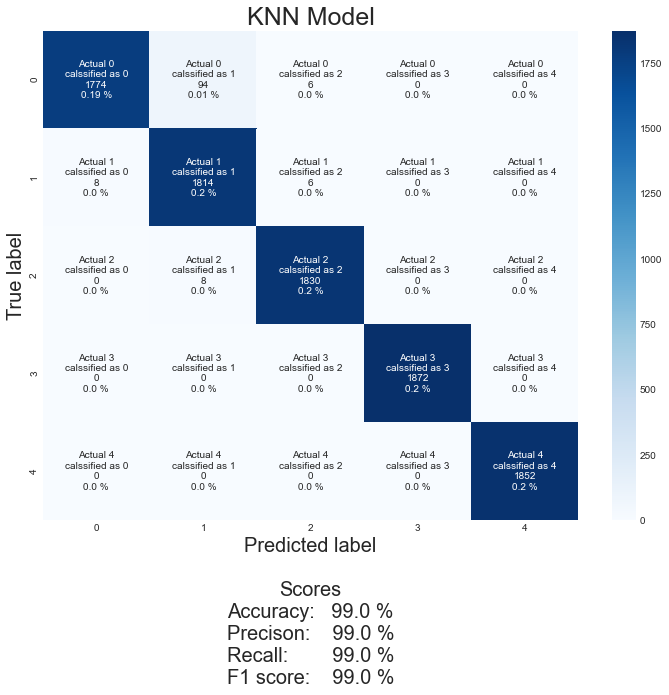

Area under the curve:  0.9952451343074774
when Random state =  1
when Random state2 =  14
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.83424435e+01
  1.80745977e+00 1.57000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.90928654e+01
  3.44000000e+00 1.14000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.60610202e+01
  1.76800000e+00 1.69780000e+04]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.72585629e+01
  3.90000000e+00 1.21000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00

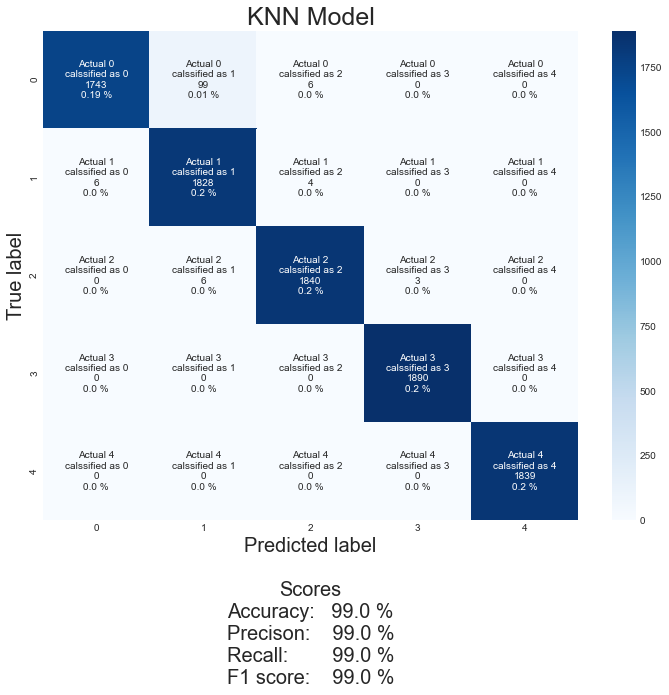

Area under the curve:  0.9945533388658087
when Random state =  1
when Random state2 =  66
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.14137695e+01
  3.63950000e+00 1.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.97427516e+01
  2.95100000e+00 9.41480000e+04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  4.09600000e+00 1.73723000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.03975661e+01
  2.97270000e+00 6.26060000e+04]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.16583838e+01
  3.20000000e+00 6.88000000e+02]
 [0.00000000e+00 0.00

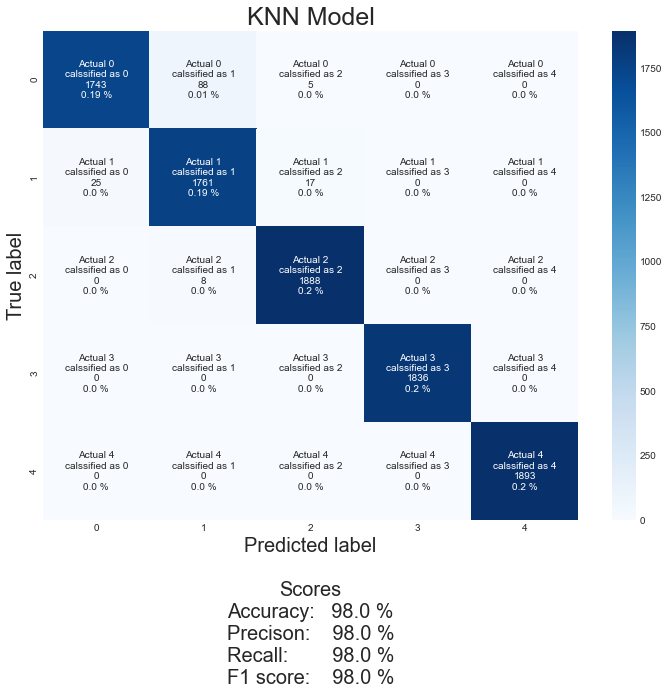

Area under the curve:  0.9932900283831071
when Random state =  7
when Random state2 =  1
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...   44.28322
     3.612      1614.        ]
 ...
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...   36.79341075
     1.80745977   25.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]] 

X_train  [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ... 34.6

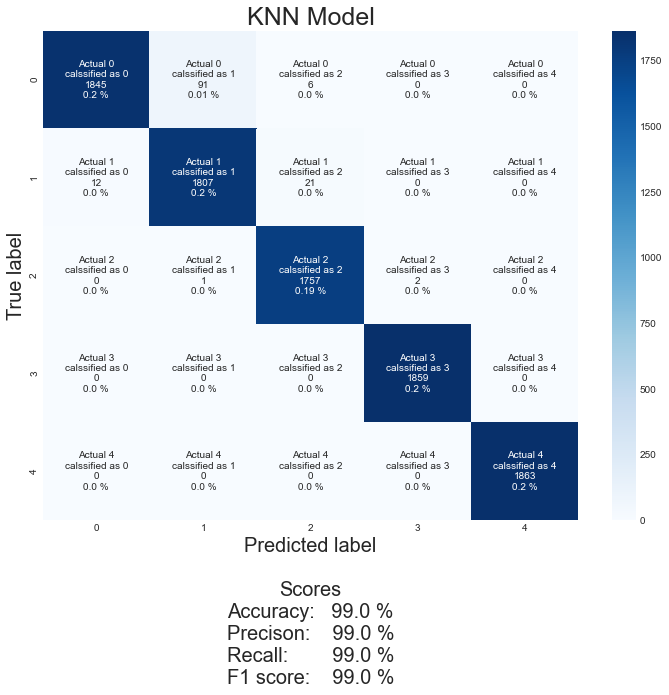

Area under the curve:  0.993046138473091
when Random state =  7
when Random state2 =  7
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.73823552e+01
  1.80745977e+00 6.10000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.99480999e+01
  4.00000000e+00 1.03037000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.87211973e+01
  3.30000000e+00 7.70000000e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.33505442e+01
  3.80000000e+00 1.60000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.0000

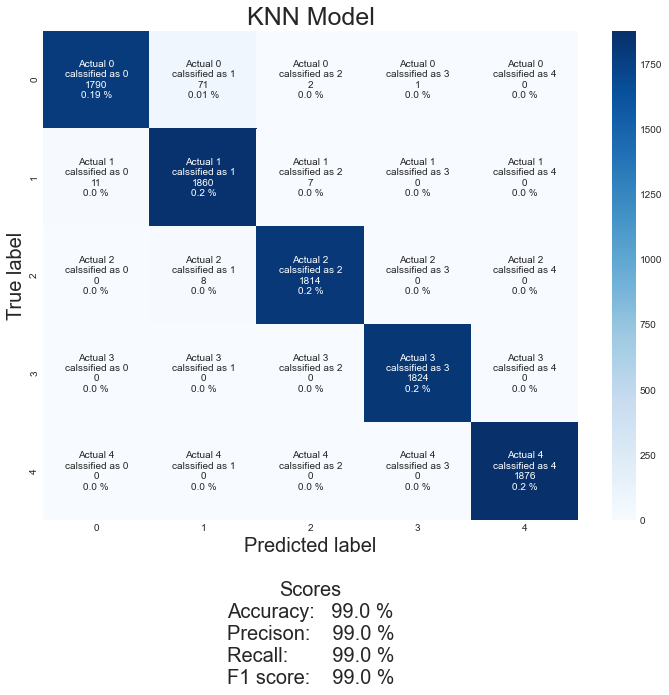

Area under the curve:  0.9960007979207287
when Random state =  7
when Random state2 =  26
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.78477497e+01
  3.48300000e+00 1.29000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.26002806e+01
  2.54700000e+00 1.00000000e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.02534198e+01
  8.95600000e-01 1.70900000e+03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.67514192e+01
  3.38970000e+00 3.08300000e+03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00

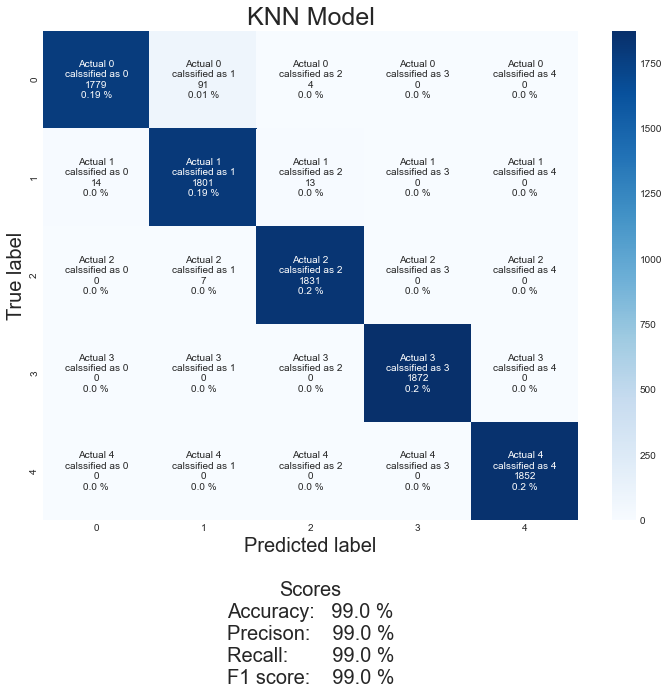

Area under the curve:  0.99430860926789
when Random state =  7
when Random state2 =  14
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.43177307e+01
  3.70000000e+00 1.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.85377863e+01
  3.20000000e+00 3.30000000e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.17607287e+01
  1.80745977e+00 6.10000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.25352477e+01
  4.00000000e+00 9.16260000e+04]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.0000

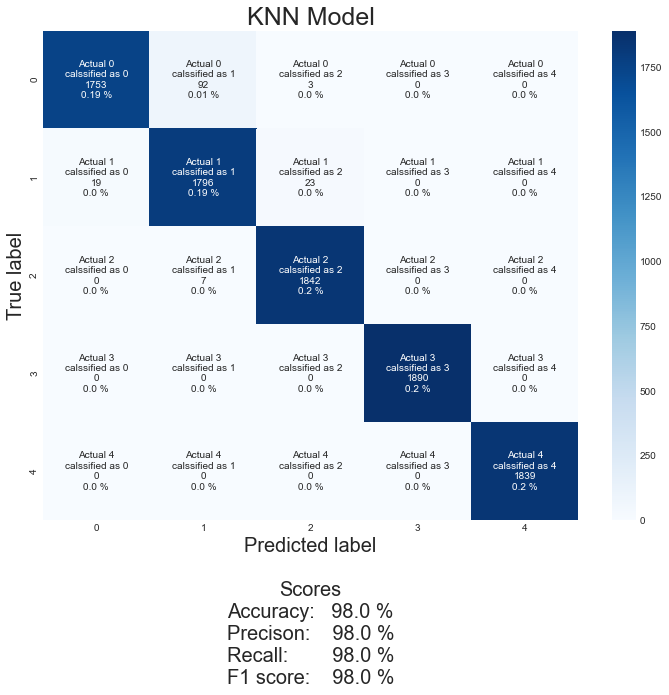

Area under the curve:  0.9936884227925674
when Random state =  7
when Random state2 =  66
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.14137695e+01
  3.63950000e+00 1.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.75228026e+01
  2.90000000e+00 5.50000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  4.09600000e+00 1.73723000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.15738427e+01
  4.00000000e+00 1.07975000e+05]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.63622593e+01
  2.05380000e+00 1.90000000e+01]
 [0.00000000e+00 0.00

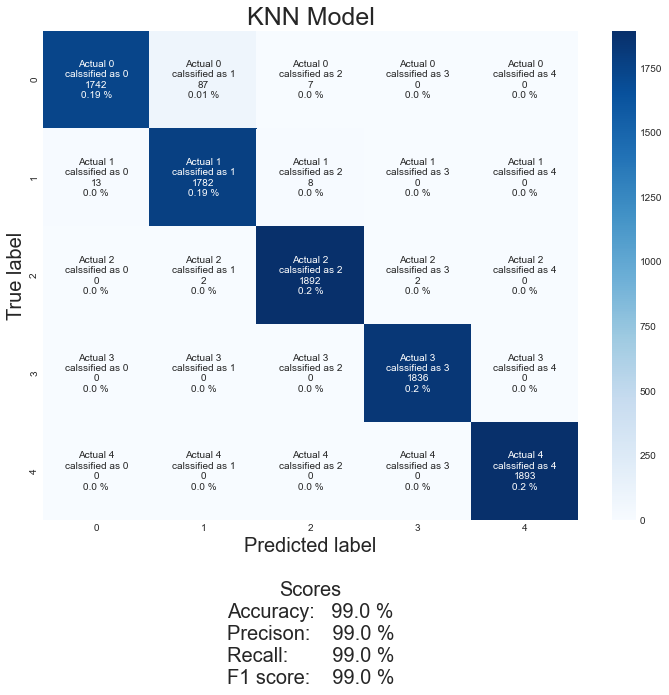

Area under the curve:  0.9950270651063065
when Random state =  26
when Random state2 =  1
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  4.09600000e+00 1.73723000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.15640493e+01
  3.85900000e+00 2.07034000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  1.80745977e+00 2.12100000e+03]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.70999201e+01
  1.80745977e+00 1.50000000e+01]
 [0.00000000e+00 0.00

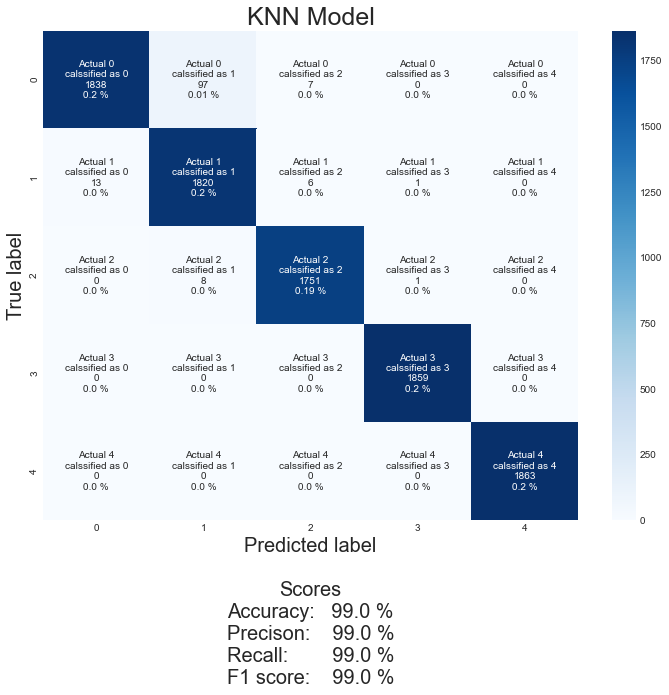

Area under the curve:  0.993215737780333
when Random state =  26
when Random state2 =  7
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.51413508e+01
  1.80745977e+00 2.86000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.09352751e+01
  3.57190000e+00 2.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.23666369e+01
  3.10000000e+00 4.20000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.97427516e+01
  2.95100000e+00 9.41480000e+04]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.67514192e+01
  3.38970000e+00 3.08300000e+03]
 [0.00000000e+00 0.000

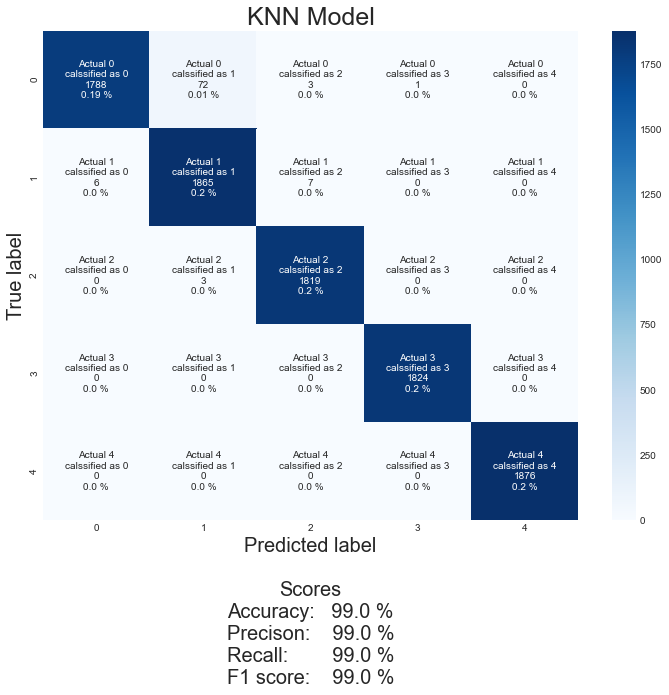

Area under the curve:  0.9964469814724435
when Random state =  26
when Random state2 =  26
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...  27.84774971   3.483
  129.        ]
 [  0.           0.           0.         ...  44.37674828   3.91
  363.        ]
 ...
 [  0.           0.           0.         ...  42.18519586   3.8608
   66.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...  41.08521946   3.9
   27.        ]] 

X_train  [[   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...   42.30401227
     4.2         164.        ]
 [   0.            0.            0.         ...   1

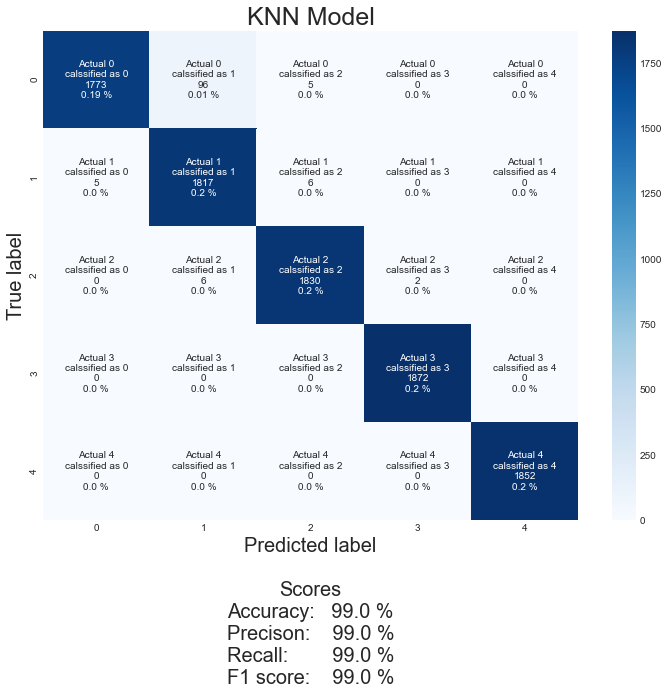

Area under the curve:  0.994920648805814
when Random state =  26
when Random state2 =  14
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.99480999e+01
  4.00000000e+00 1.03037000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.66216192e+01
  4.93160000e+00 1.00000000e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.94163238e+01
  3.45220000e+00 5.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00

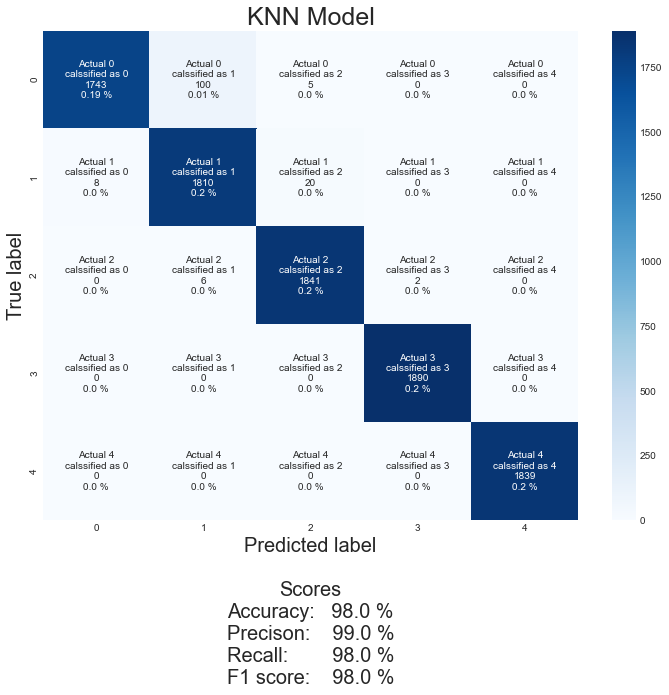

Area under the curve:  0.9934420624432649
when Random state =  26
when Random state2 =  66
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.14137695e+01
  3.63950000e+00 1.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.26273265e+01
  1.41330000e+00 4.41000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.68020286e+01
  3.82410000e+00 2.00000000e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  4.09600000e+00 1.73723000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.30166253e+01
  1.80745977e+00 8.95790000e+04]
 [0.00000000e+00 0.0

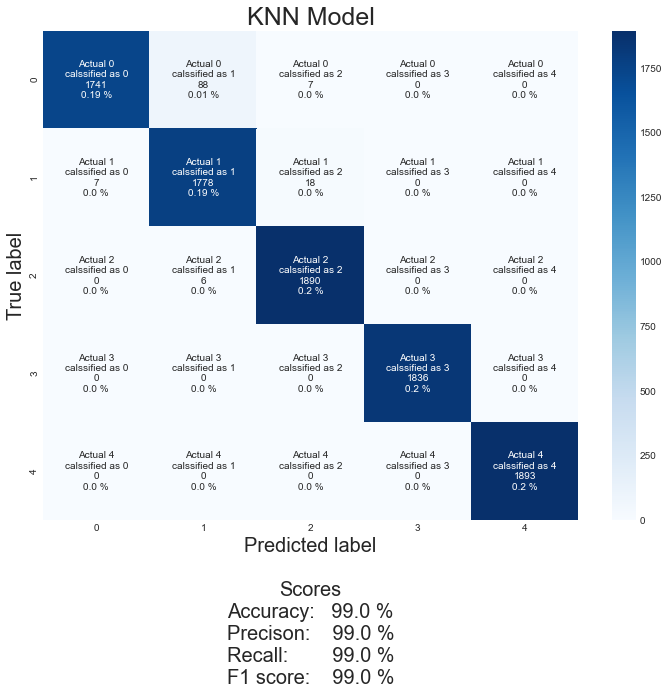

Area under the curve:  0.9943505331386702
when Random state =  14
when Random state2 =  1
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.05375380e+01
  2.30000000e+00 1.25582508e+04]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.87633625e+01
  2.90000000e+00 5.70000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

X_train  [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.  

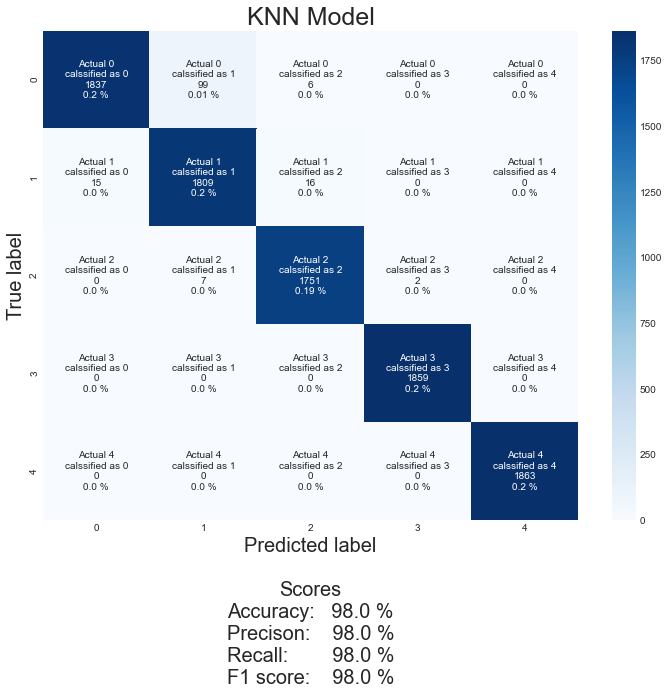

Area under the curve:  0.9934994241834871
when Random state =  14
when Random state2 =  7
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[  0.           0.           0.         ...  16.46877181   1.80745977
    5.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...  20.00539568   2.
  143.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.70999201e+01
  1.80745977e+00 1.50000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.

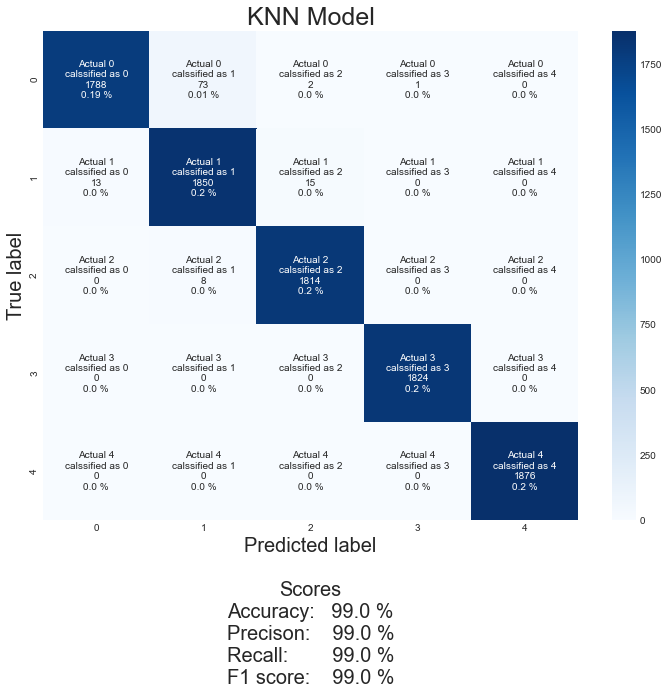

Area under the curve:  0.9955653100447732
when Random state =  14
when Random state2 =  26
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.78477497e+01
  3.48300000e+00 1.29000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  5.92900000e+00 1.89590000e+04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.78228891e+01
  3.20000000e+00 2.70000000e+01]] 

X_train  [[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.        

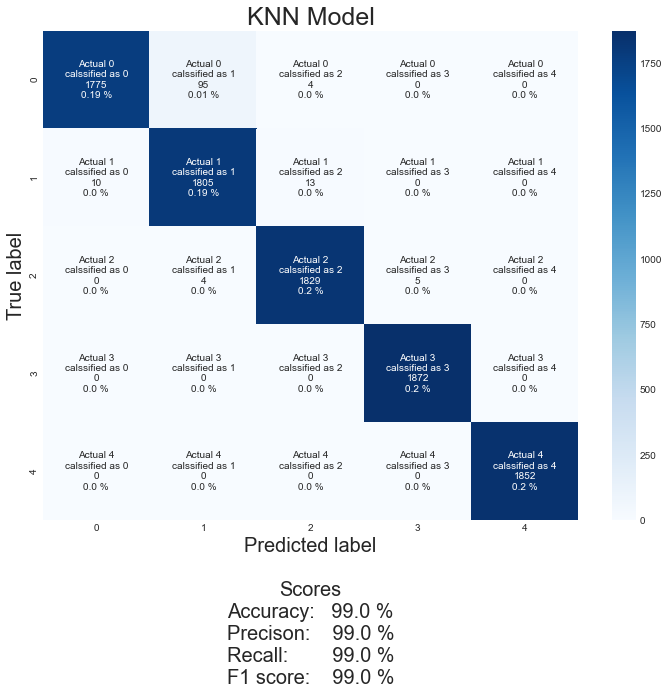

Area under the curve:  0.9938437542236198
when Random state =  14
when Random state2 =  14
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.86251471e+01
  2.20000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.50143332e+01
  3.51580000e+00 1.24200000e+03]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.0

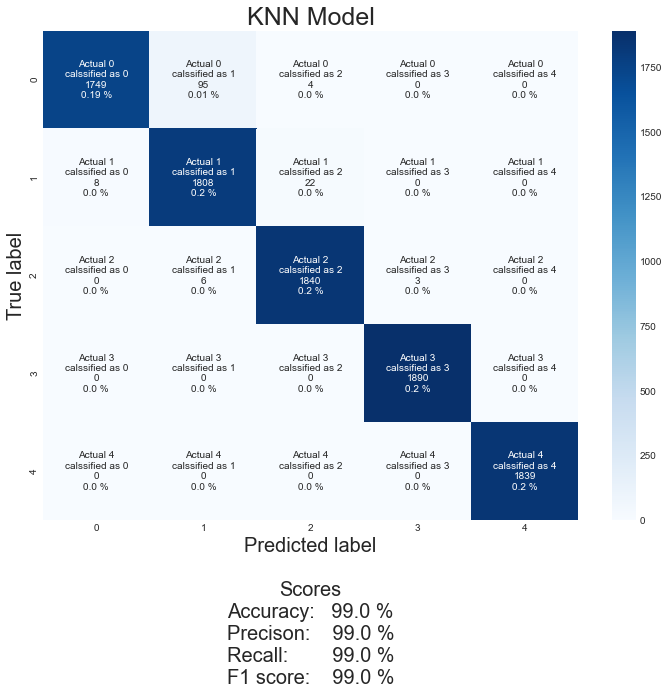

Area under the curve:  0.9940637201597193
when Random state =  14
when Random state2 =  66
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.14137695e+01
  3.63950000e+00 1.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 2.58559446e+01
  3.29630000e+00 3.90000000e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  4.09600000e+00 1.73723000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.60806628e+01
  1.80745977e+00 8.42280000e+04]
 [0.00000000e+00 0.0

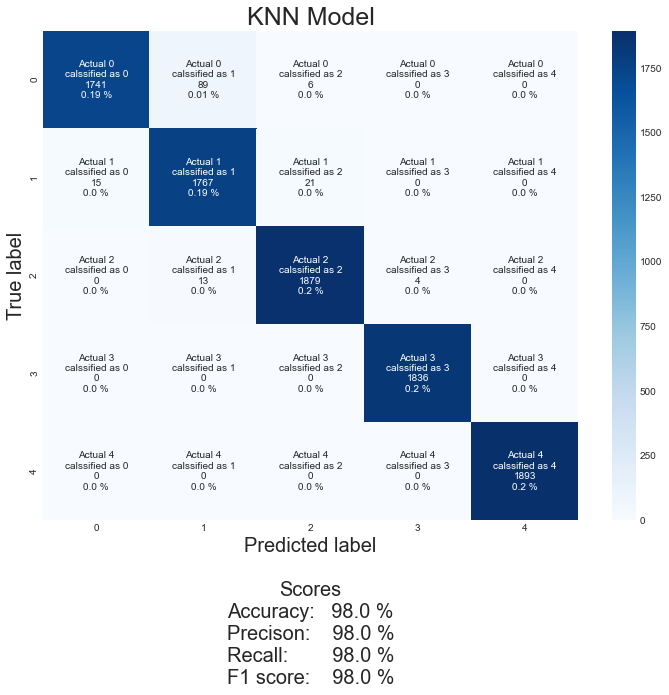

Area under the curve:  0.9939379393150617
when Random state =  66
when Random state2 =  1
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[ 0.          0.          0.         ... 49.32403627  1.80745977
  92.        ]
 [ 0.          0.          0.         ... 46.03611986  3.378
  66.        ]
 [ 0.          0.          1.         ... 24.34824044  1.80745977
  43.        ]
 ...
 [ 0.          0.          1.         ... 24.49758097  1.80745977
  63.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.91296595e+01
  2.03840000e+00 9.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 

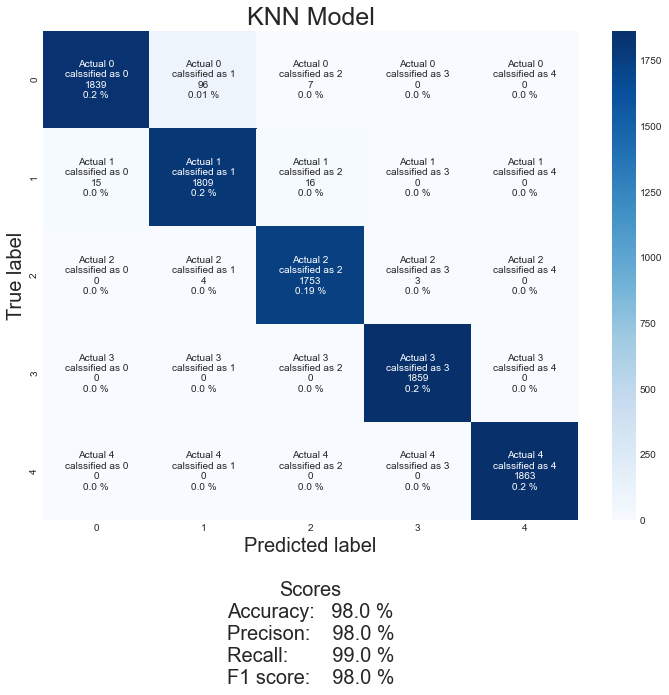

Area under the curve:  0.99350874279321
when Random state =  66
when Random state2 =  7
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.99480999e+01
  4.00000000e+00 1.03037000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.75687395e+01
  2.40000000e+00 6.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.43767483e+01
  3.91000000e+00 3.63000000e+02]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  1.80745977e+00 2.21500000e+03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.76422979e+01
  1.80745977e+00 2.67160000e+04]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.0000

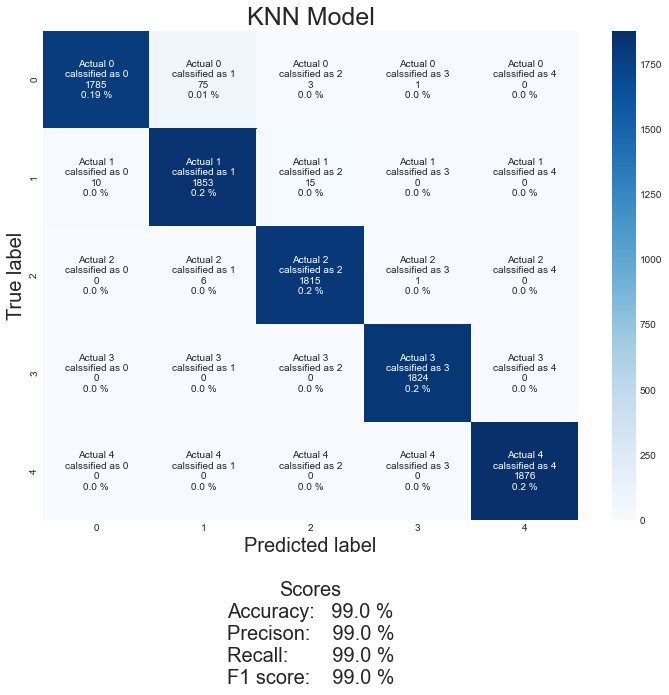

Area under the curve:  0.9961169299953591
when Random state =  66
when Random state2 =  26
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...   27.84774971
     3.483       129.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...   45.01433323
     3.5158     1242.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]] 

X_train  [[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...  42.30401227   4.2
  164.        ]
 [  0.           0.         

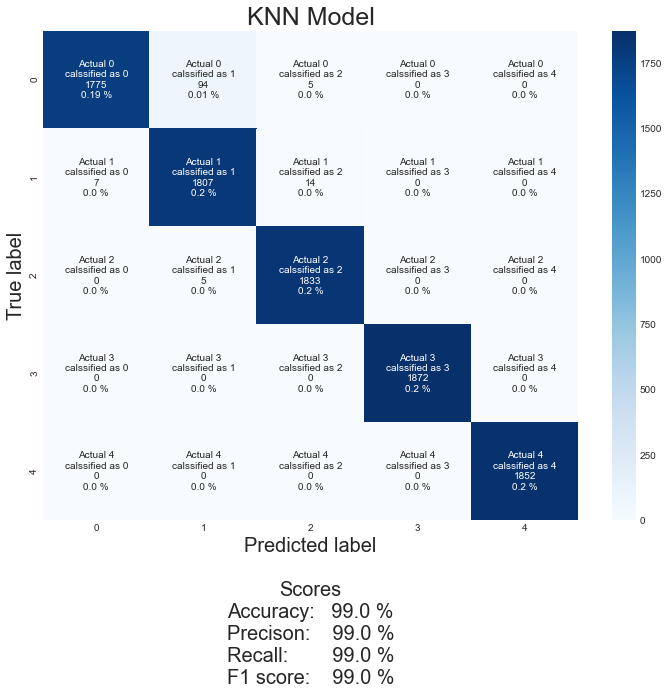

Area under the curve:  0.994283400143025
when Random state =  66
when Random state2 =  14
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  1.80745977e+00 2.65300000e+03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.50606832e+01
  2.05520000e+00 3.49307000e+05]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.80111276e+01
  1.80745977e+00 1.60000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.53714512e+01
  1.80745977e+00 9.00000000e+01]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00

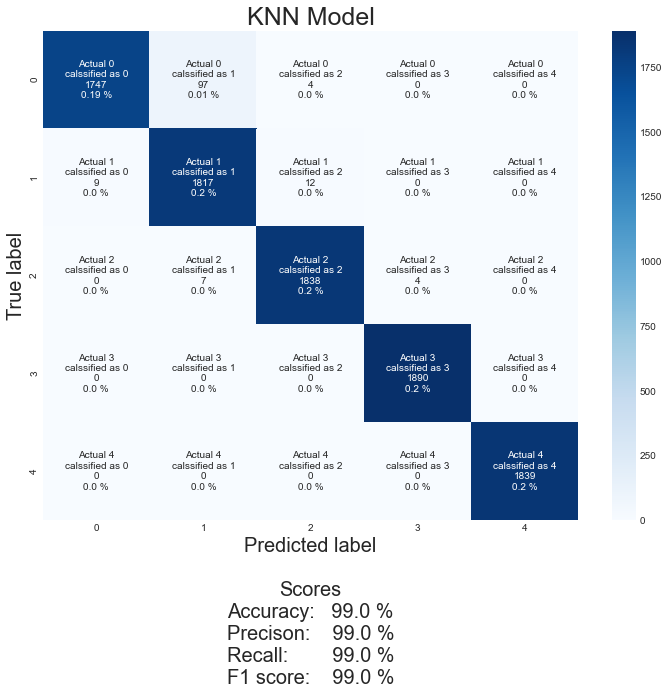

Area under the curve:  0.9937163437514014
when Random state =  66
when Random state2 =  66
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.14137695e+01
  3.63950000e+00 1.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.11310266e+01
  2.20000000e+00 1.25582508e+04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.19424059e+01
  3.40130000e+00 1.00000000e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  4.09600000e+00 1.73723000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.73772390e+01
  2.39840000e+00 1.11948000e+05]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.53154697e+01
  1.80745977e+00 1.30000000e+01]
 [0.00000000e+00 0.0

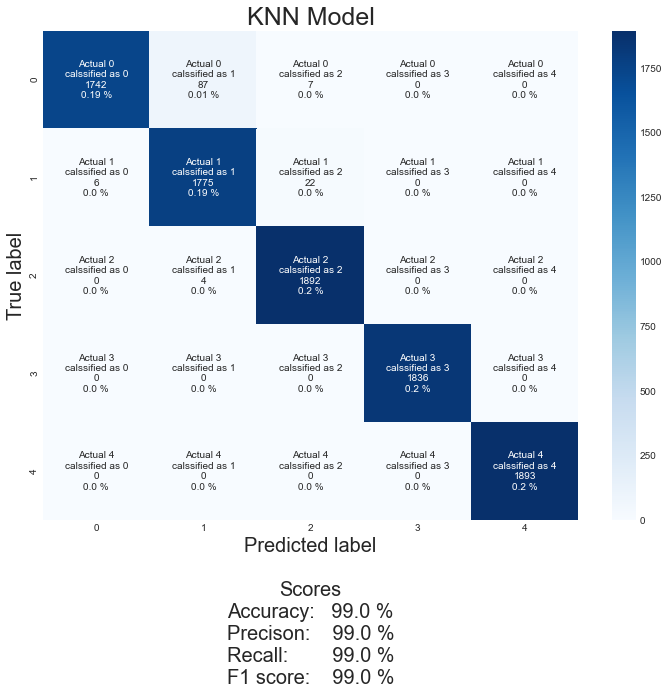

Area under the curve:  0.9942447144153299


Train Accuracy  100.0 %
Standard Deviation:  0.0 %

Test Accuracy  98.76 %
Standard Deviation:  0.42708313008125237 %

precision  98.8 %
Standard Deviation:  0.4 %

recall  98.8 %
Standard Deviation:  0.4 %

f1_score  98.76 %
Standard Deviation:  0.42708313008125237 %


In [29]:
model_evaluation()